In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.plotting import parallel_coordinates

Load the dataset to examine its structure and content for analysis

In [3]:
file_path = './input/College.csv'
college_data = pd.read_csv(file_path)

Display the first few rows to understand its structure and contents

In [5]:
df = college_data
df

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [6]:
# 選擇相關欄位
data = df[['Private', 'Outstate', 'Apps', 'Accept', 'Enroll', 'perc.alumni', 'Grad.Rate', 'F.Undergrad', 'P.Undergrad']]

In [7]:
# 分組計算描述性統計
grouped_stats = data.groupby('Private').describe()
print(grouped_stats)

        Outstate                                                               \
           count          mean          std     min     25%      50%      75%   
Private                                                                         
No         212.0   6813.410377  2145.248389  2580.0  5366.0   6609.0   7844.0   
Yes        565.0  11801.693805  3707.470822  2340.0  9100.0  11200.0  13970.0   

                   Apps               ... F.Undergrad          P.Undergrad  \
             max  count         mean  ...         75%      max       count   
Private                               ...                                    
No       15732.0  212.0  5729.919811  ...     12507.0  31643.0       212.0   
Yes      21700.0  565.0  1977.929204  ...      2018.0  27378.0       565.0   

                                                                         
                mean          std  min    25%     50%      75%      max  
Private                                                

---

## 分析目的 | Purpose of Analysis：
#### 繪製箱型圖以了解私立和公立學校的畢業率的分佈情況

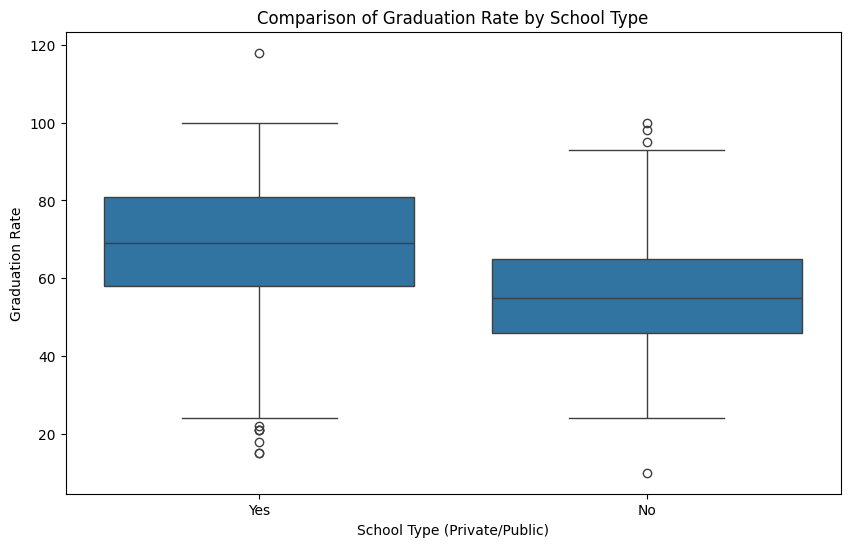

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Private', y='Grad.Rate')
plt.title('Comparison of Graduation Rate by School Type')
plt.xlabel('School Type (Private/Public)')
plt.ylabel('Graduation Rate')
plt.show()

### 結論 | Conclusion
#### 展示私立和公立學校的畢業率的分佈情況，私立學校的中位數（Q2）為 69，高於公立學校的中位數 55，四分位數（Q1 和 Q3）的範圍在私立學校中為 58 到 81，公立學校為 46 到 65，可以看出私立學校的四分位範圍也略高，顯示私立學校畢業率的整體水準偏高。特別的是，私立學校中其中一間學校的畢業率為118，可能是該校較多推行雙聯學位的關係，以致於畢業人數大於原始入學人數。私立學校的整體畢業率範圍比公立學校更大（約 20 到 118），而公立學校的範圍較小（約 20 到 100），表明私立學校的畢業率分布較廣，而公立學校的分佈相對更集中。

#### From the perspective of graduation rates, the 1st and 3rd quartiles for private schools are approximately 60 and 80, respectively; for public schools, they are around 50 and 65. Looking at the maximum values, the highest graduation rate for private schools reaches 100, while for public schools it is 90. This indicates that private schools tend to have higher graduation rates.

---

## 分析目的 | Purpose of Analysis：
### 比較私立與公立大學的Outstate學費分布狀況

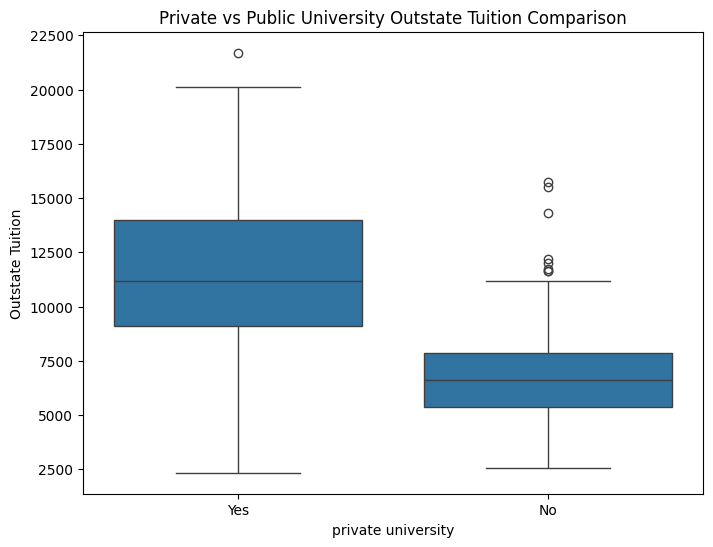

In [11]:
# 私立與公立大學的Outstate學費箱形圖
plt.figure(figsize=(8,6))
sns.boxplot(x='Private', y='Outstate', data=data)
plt.title('Private vs Public University Outstate Tuition Comparison')
plt.xlabel('private university')
plt.ylabel('Outstate Tuition')
plt.show()

### 結論 | Conclusion
#### 此圖為私立與公立大學的Outstate學費箱形圖，圖中顯示，私立學校的學費級距在2500～20000的區間，多數私立學校學費落於9000～14000；公立學校的學費級距則位於2500～11000，多數學費為5000～7500，由此可知兩種學校在學費制定有一定落差
#### This figure shows a box plot of out-of-state tuition fees for private and public universities. The plot indicates that tuition fees for private schools fall within the range of 2,500 to 20,000, with most private school tuition fees falling between 9,000 and 14,000. On the other hand, tuition fees for public schools range from 2,500 to 11,000, with the majority of fees falling between 5,000 and 7,500. This demonstrates that there is a significant disparity in tuition fee structures between the two types of schools.

----

## 分析目的 | Purpose of Analysis：
### 比較私立與公立大學的畢業人數與申請人數的分布狀況

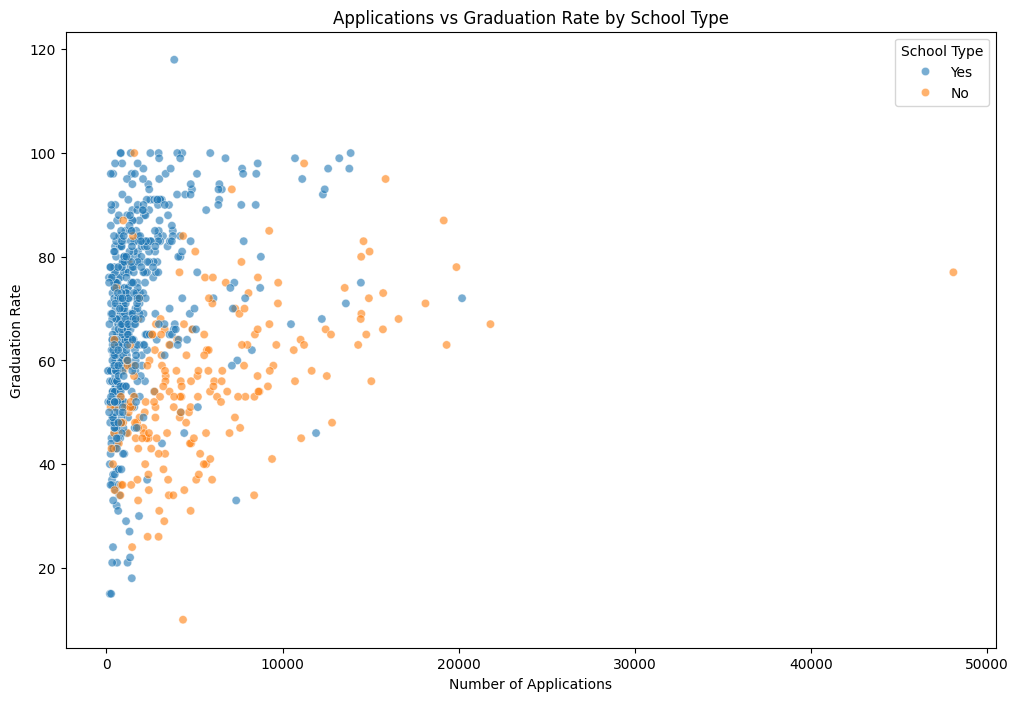

In [12]:
# 繪製申請人數 vs 畢業率的散點圖
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='Apps', y='Grad.Rate', hue='Private', alpha=0.6)
plt.title('Applications vs Graduation Rate by School Type')
plt.xlabel('Number of Applications')
plt.ylabel('Graduation Rate')
plt.legend(title='School Type')
plt.show()

### 結論 | Conclusion
#### 申請人數 vs 畢業率的散佈圖，由圖可知，私立學校的申請人數多集中於0～5000，且畢業率從20%～100%都有;公立學校的申請數則較為分散，但畢業率多位於40%～60%，可知私立學校有高申請人數且較高的畢業率;公立學校申請人數雖多，但畢業率較私立學校低
#### The scatter plot of applicant numbers versus graduation rates shows that for private schools, the number of applicants is mostly concentrated between 0 and 5,000, with graduation rates ranging from 20% to 100%. For public schools, the number of applicants is more dispersed, but graduation rates are mostly between 40% and 60%. This indicates that private schools tend to have high numbers of applicants and higher graduation rates, while public schools, although having many applicants, generally have lower graduation rates compared to private schools.

---

## 分析目的 | Purpose of Analysis：
### 比較私立與公立大學的**錄取人數與畢業率**的分布狀況與**申請人數與畢業率**的分布狀況

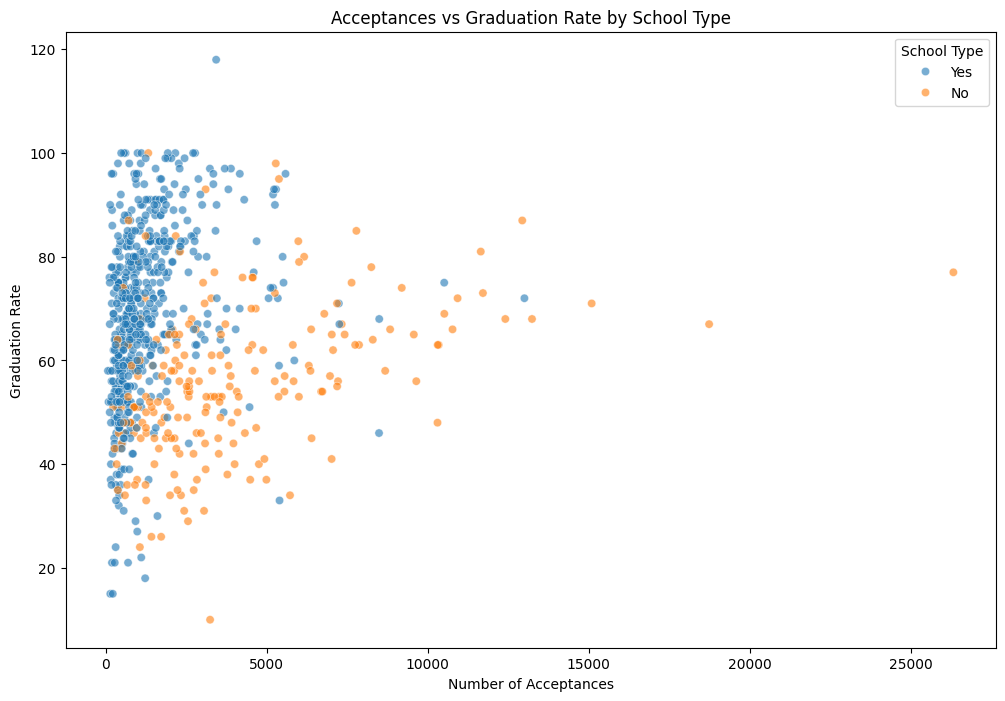

In [14]:
# 繪製錄取人數 vs 畢業率的散點圖
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='Accept', y='Grad.Rate', hue='Private', alpha=0.6)
plt.title('Acceptances vs Graduation Rate by School Type')
plt.xlabel('Number of Acceptances')
plt.ylabel('Graduation Rate')
plt.legend(title='School Type')
plt.show()

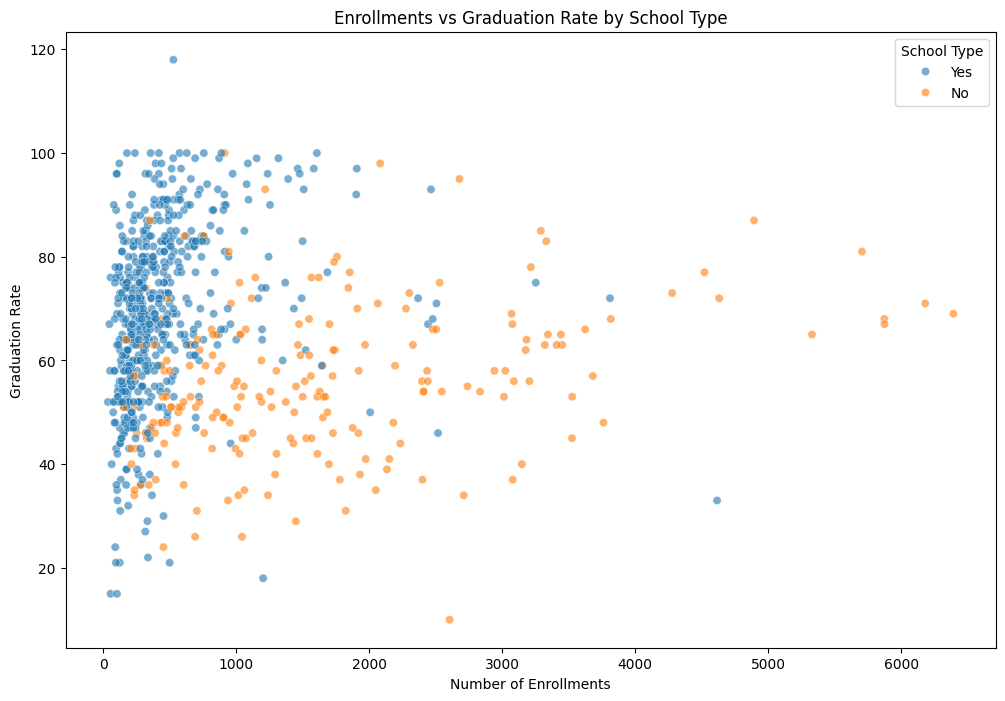

In [15]:
# 繪製入學人數 vs 畢業率的散點圖
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='Enroll', y='Grad.Rate', hue='Private', alpha=0.6)
plt.title('Enrollments vs Graduation Rate by School Type')
plt.xlabel('Number of Enrollments')
plt.ylabel('Graduation Rate')
plt.legend(title='School Type')
plt.show()

### 結論 | Conclusion
#### 註冊人數VS畢業率，私立學校註冊人數多低於1000，但畢業率可達100%，公立學校雖有高註冊數的學校，但畢業率較少達到100%，多數位於40%～70%
#### For the number of enrolled students versus graduation rates, private schools mostly have enrollment numbers below 1,000, but their graduation rates can reach up to 100%. Although some public schools have high enrollment numbers, their graduation rates rarely reach 100% and mostly fall between 40% and 70%.

---

## 分析目的 | Purpose of Analysis：
#### 比較公私立學校的註冊率分布

C:\Users\love7\AppData\Local\Temp\ipykernel_19860\1764574670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Enroll_Rate'] = data['Enroll'] / data['Accept']


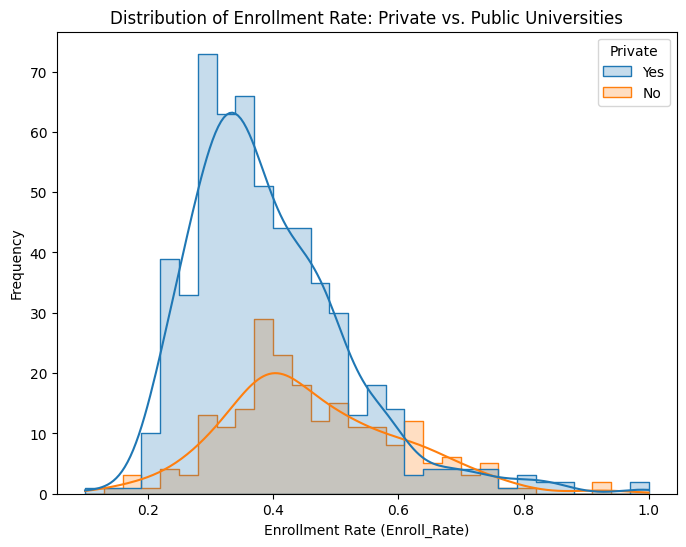

In [17]:
data['Enroll_Rate'] = data['Enroll'] / data['Accept']
plt.figure(figsize=(8,6))
sns.histplot(x='Enroll_Rate', hue='Private', data=data, bins=30, kde=True, element="step")
plt.title('Distribution of Enrollment Rate: Private vs. Public Universities')
plt.xlabel('Enrollment Rate (Enroll_Rate)')
plt.ylabel('Frequency')
plt.show()

### 結論 | Conclusion
#### 註冊率，私立學校多數學校未達0.5，部分公立學校註冊率雖也未達0.5但註冊率中位數大約為0.4，較私立學校高，且註冊率大於0.6之部分，公立學校表現是比私立學校好的
#### Regarding enrollment rates, most private schools do not reach 0.5. While some public schools also have enrollment rates below 0.5, the median enrollment rate for public schools is approximately 0.4, which is higher than that of private schools. Moreover, for enrollment rates above 0.6, public schools perform better than private schools.

---

## 分析目的 | Purpose of Analysis：
#### 比較公私立學校的錄取率分布

C:\Users\love7\AppData\Local\Temp\ipykernel_19860\3861703984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Accept_Rate'] = data['Accept'] / data['Apps']


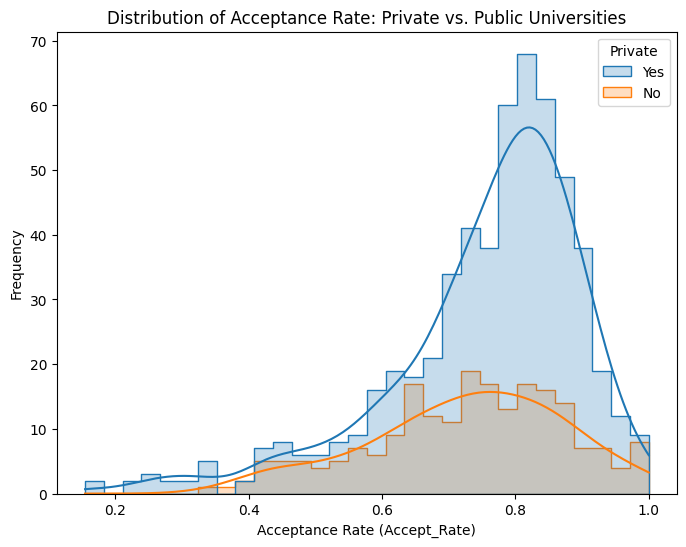

In [18]:
data['Accept_Rate'] = data['Accept'] / data['Apps']
plt.figure(figsize=(8,6))
sns.histplot(x='Accept_Rate', hue='Private', data=data, bins=30, kde=True, element="step")
plt.title('Distribution of Acceptance Rate: Private vs. Public Universities')
plt.xlabel('Acceptance Rate (Accept_Rate)')
plt.ylabel('Frequency')
plt.show()

### 結論 | Conclusion
#### 錄取率，私立學校多數位於0.7～0.9之間，公立學校則平均分布於0.6～1.0之間，且可從圖中趨勢線得知，私立學校在低錄取率仍有學校，但公立學校則較少，可以推測部分公立學校錄取門檻可能較高
#### In terms of acceptance rates, most private schools fall between 0.7 and 0.9, while public schools are evenly distributed between 0.6 and 1.0. From the trend lines in the plot, it can be observed that there are still some private schools with low acceptance rates, but fewer public schools in that range. This suggests that some public schools may have higher admission thresholds.

---

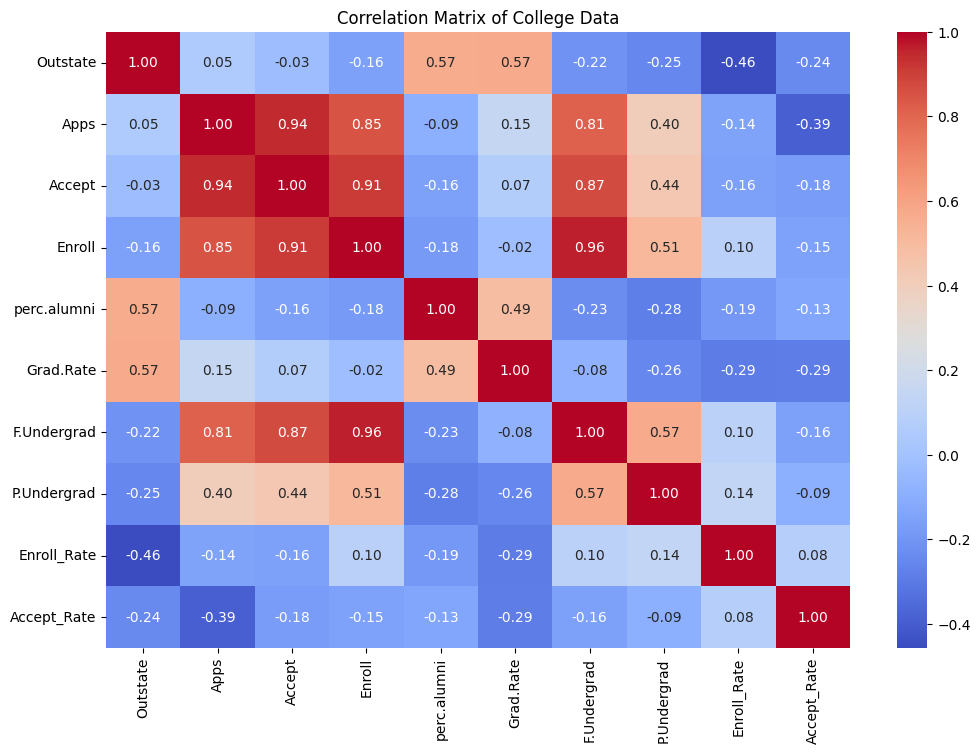

In [20]:
# 相關矩陣
numeric_data = data.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of College Data')
plt.show()

### 結論 | Conclusion
#### 從圖中可知，畢業率在對多數便因下多為負相關 ，但對外州生學費(Outstate)和畢業校友捐贈(perc.alumni)為正相關，可以推測，畢業率高的學校可能因畢業校友的捐獻和針對外州生的學費收入，會有較多的教學資源供學生使用，會有更好的學習環境，間接使畢業率提升
#### From the plot, it can be seen that graduation rates are negatively correlated with most variables. However, graduation rates are positively correlated with out-of-state tuition (Outstate) and the percentage of alumni donations (perc.alumni). It can be inferred that schools with high graduation rates may have more educational resources available for students due to alumni donations and tuition income from out-of-state students. This could lead to a better learning environment, which indirectly contributes to higher graduation rates.

---

In [22]:
file_path = './input/College.csv'
college_data = pd.read_csv(file_path)

## 分析目的 | Purpose of Analysis：
#### 觀察師生比是否對畢業率有影響，因師生比常對教學品質產生影響，故師生比高低可能反映出學校資源分配是否影響學生成就。
#### To examine whether the student-to-faculty ratio(S.F.Ratio) affects the graduation rate(Grad.Rate), as this ratio often influences the quality of education. Therefore, variations in the student-to-faculty ratio may reflect how a school’s resource allocation impacts student achievement.

#### 步驟一：公私立大學的師生比分析
#### Step1: Analysis of Student-Faculty Ratio in Public and Private Universities

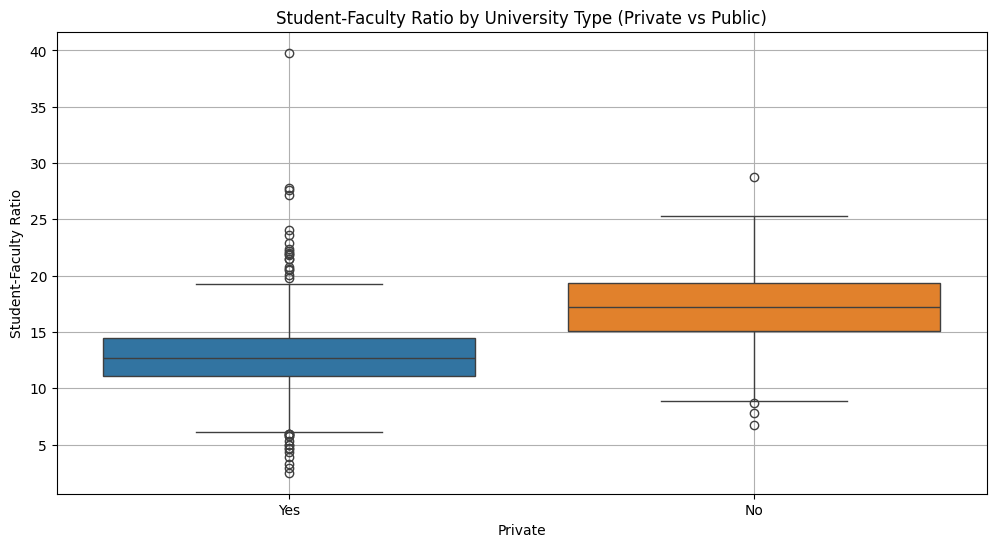

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=college_data, x='Private', y='S.F.Ratio', hue='Private', palette=['#1f77b4', '#ff7f0e'])
plt.title('Student-Faculty Ratio by University Type (Private vs Public)')
plt.xlabel('Private')
plt.ylabel('Student-Faculty Ratio')
plt.grid(True)
plt.show()

#### 結果 | Results
- 箱形圖可以看到，私立大學的師生比略低於公立大學，說明私立大學通常有較多的教師資源分配在學生身上，而公立大學的師生比相對較高，表現出教職員的資源可能分配較少。
- The box plot indicates that private universities tend to have a slightly lower student-faculty ratio compared to public universities, suggesting that private universities typically allocate more faculty resources per student, while public universities generally have higher ratios, reflecting potentially fewer resources per student.

#### 步驟二：師生比與畢業率的關係
#### Step2: Relationship between Student-Faculty Ratio and Graduation Rate

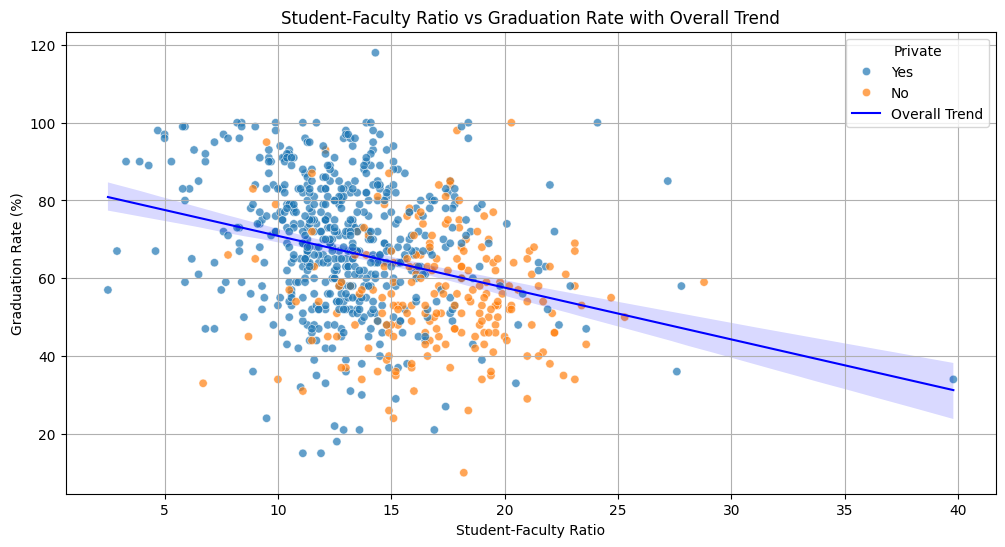

In [27]:
# Step: Scatter plot of Student-Faculty Ratio vs Graduation Rate with a single trend line
plt.figure(figsize=(12, 6))

sns.scatterplot(data=college_data, x='S.F.Ratio', y='Grad.Rate', hue='Private', alpha=0.7)

sns.regplot(data=college_data, x='S.F.Ratio', y='Grad.Rate', scatter=False, color='blue', line_kws={'linestyle':'-', 'linewidth': 1.5}, label='Overall Trend')

plt.title('Student-Faculty Ratio vs Graduation Rate with Overall Trend')
plt.xlabel('Student-Faculty Ratio')
plt.ylabel('Graduation Rate (%)')
plt.legend(title='Private')
plt.grid(True)
plt.show()

#### 結果 | Results
- 從散點圖看到，私立大學（綠點）和公立大學（橘點）在師生比和畢業率上的分佈有所不同。平均來說，低師生比的大學傾向有較高的畢業率。但此分析不能完全解釋所有大學，仍然存在少數某些師生比高但同時畢業率也高的學校。
- The scatter plot shows different distributions of student-faculty ratio and graduation rate between private universities (blue circles) and public universities (orange circles). Generally, universities with lower student-faculty ratios tend to have higher graduation rates. However, this trend is not universally applicable, as some universities with higher ratios still achieve high graduation rates.

### 結論 | Conclusion
- 分析結果顯示，較低的師生比通常與較高的畢業率相關，特別是在私立大學中更為明顯。這可能是因為較低的師生比讓學生獲得更多個別指導。不過，公立大學中部分高師生比的情況下，畢業率仍然表現良好，說明畢業率受多重因素影響，並不僅限於師生比。
- The analysis indicates that a lower student-faculty ratio is generally associated with higher graduation rates, especially in private universities, likely due to increased individual support. However, some public universities with higher ratios also maintain good graduation rates, suggesting that multiple factors influence graduation rates beyond just student-faculty ratios.

---

## **Grad.Rate & PhD**
#### 分析目的 | Purpose of Analysis：
- 觀察教職員擁有博士學位的比例（PhD）是否與畢業率（Grad.Rate）存在關聯。因高博士學位比例的教職員可能提供學生更多的學術幫助，進而提升畢業率。
- To examine whether the percentage of faculty with doctoral degrees (PhD) is associated with the graduation rate (Grad.Rate), as a higher proportion of faculty with doctoral degrees may offer students greater academic support, potentially improving graduation rates.

#### 步驟1：教職員博士比例與畢業率的關聯
#### Step1: Relationship between Faculty PhD Percentage and Graduation Rate

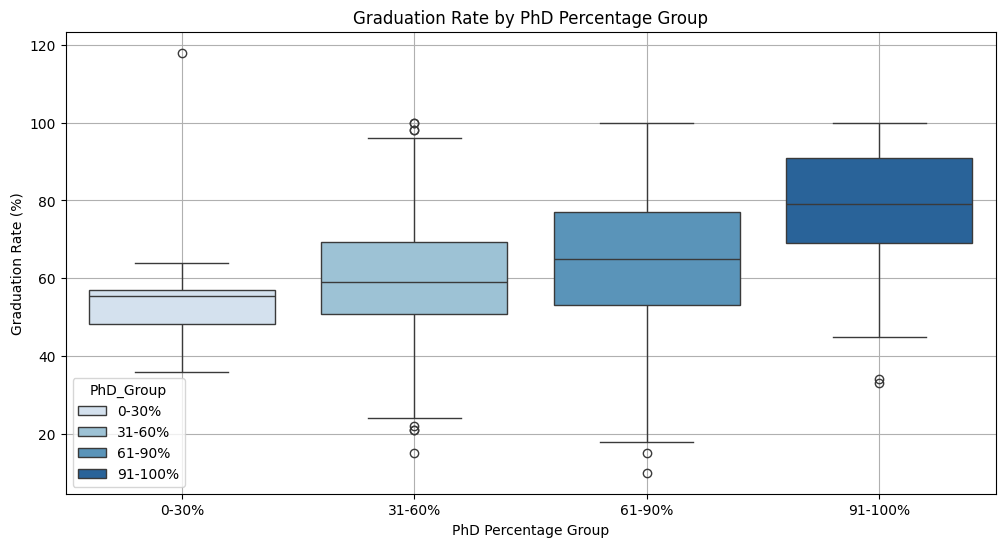

In [44]:
college_data['PhD_Group'] = pd.cut(college_data['PhD'], bins=[0, 30, 60, 90, 100], labels=['0-30%', '31-60%', '61-90%', '91-100%'])

plt.figure(figsize=(12, 6))
sns.boxplot(data=college_data, x='PhD_Group', y='Grad.Rate', hue='PhD_Group', palette='Blues', dodge=False)
plt.title('Graduation Rate by PhD Percentage Group')
plt.xlabel('PhD Percentage Group')
plt.ylabel('Graduation Rate (%)')
plt.grid(True)
plt.show()

#### 結果 | Results
- 從箱形圖可以看出，隨著 PhD 比例的提升，畢業率的中位數逐步上升。可能表示高比例的博士學位教職員能為學生提供更好的學術幫助，進而提高畢業率。
- The box plot reveals that as the PhD percentage increases, the median graduation rate also rises. This may indicate that a higher proportion of faculty with doctoral degrees can provide better academic support to students, thereby contributing to higher graduation rates.

#### 步驟2：公私立大學的教職員博士比例比較
#### Step 2: Comparing Faculty PhD Percentages between Public and Private Universities

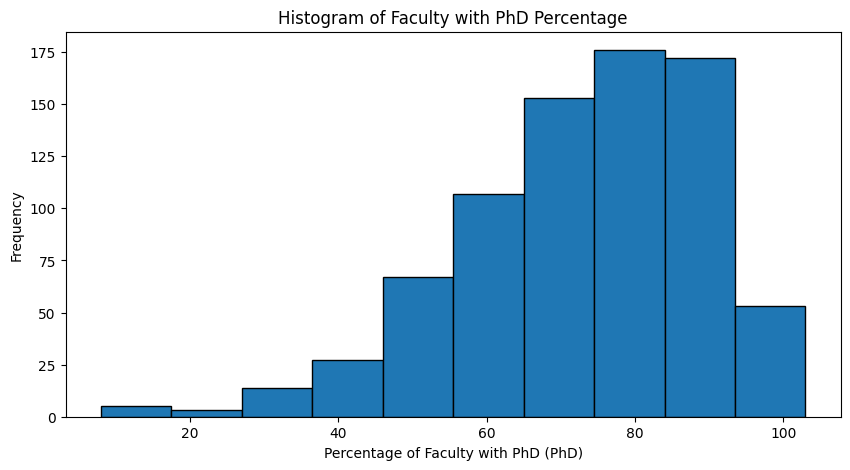

In [80]:
# 觀察所有學校的教職員博士分布
plt.figure(figsize=(10, 5))
plt.hist(college_data['PhD'], bins=10, edgecolor='black')
plt.title("Histogram of Faculty with PhD Percentage")
plt.xlabel("Percentage of Faculty with PhD (PhD)")
plt.ylabel("Frequency")
plt.show()

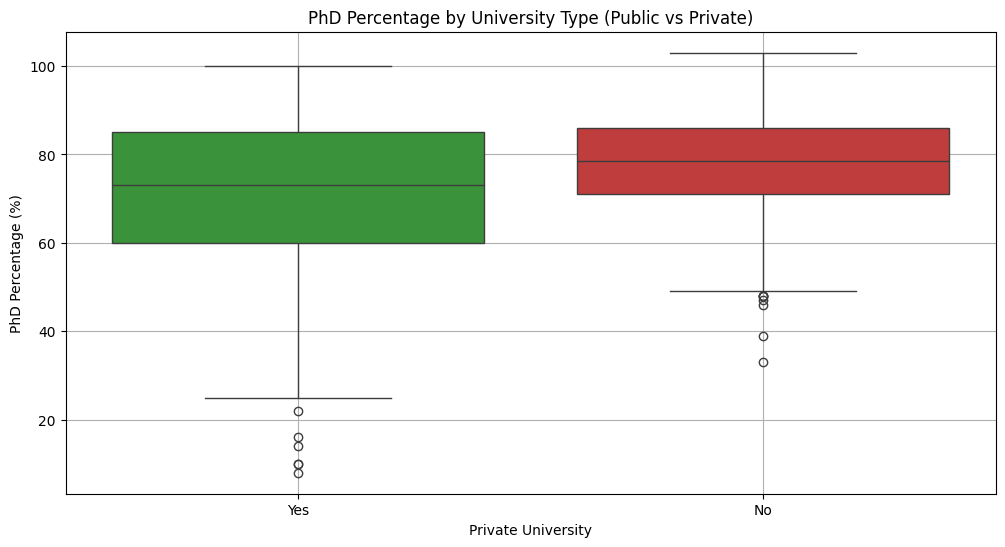

In [81]:
#看公私立的教職員平均分布落在哪
plt.figure(figsize=(12, 6))
sns.boxplot(data=college_data, x='Private', y='PhD', palette=['#2ca02c', '#d62728'], hue='Private')
plt.title('PhD Percentage by University Type (Public vs Private)')
plt.xlabel('Private University')
plt.ylabel('PhD Percentage (%)')
plt.grid(True)
plt.show()

#### 結果 | Results
- 從直方圖可知，大多學校的教職員博士比率約落在60%到90%之間，並且從箱形圖可知，公立大學的博士學位比例中位數高於私立大學，並且比例分佈相對集中，變異範圍較小。可能表示公立大學在招聘和資源分配上更重視高學歷教職員，以提升學術能量。私立大學則可能受其因素影響，在博士學位比例較不穩定。
- The histogram shows that the PhD percentage for faculty in most schools falls between 60% and 90%. Additionally, the box plot shows that the median PhD percentage in public universities is higher than in private universities, with a relatively concentrated distribution and smaller variance. This may suggest that public universities place greater emphasis on hiring highly educated faculty and allocating resources to enhance academic capacity. In contrast, private universities may have less consistency in the proportion of faculty with doctoral degrees, potentially due to different influencing factors.

#### 步驟3：公私立教職員博士率與畢業率關係
#### Step3: Relationship between Faculty PhD Rate and Graduation Rate in Public vs. Private Universities

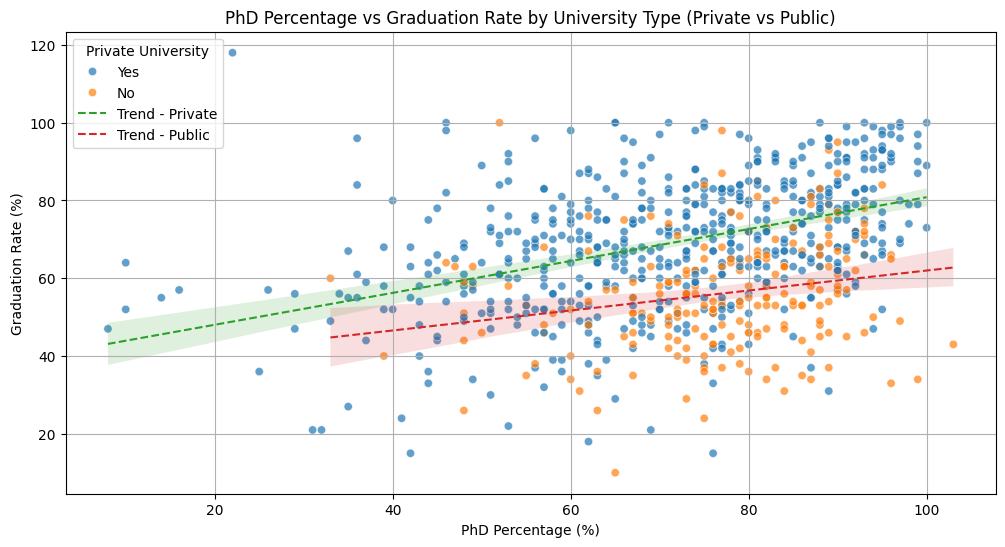

In [55]:
# 繪製 PhD 比例與畢業率的散佈圖
plt.figure(figsize=(12, 6))
sns.scatterplot(data=college_data, x='PhD', y='Grad.Rate', hue='Private', alpha=0.7)

# 添加私立大學的趨勢線
sns.regplot(data=college_data[college_data['Private'] == 'Yes'], x='PhD', y='Grad.Rate', scatter=False, color='#2ca02c', line_kws={'linestyle':'--', 'linewidth': 1.5}, label='Trend - Private')

# 添加公立大學的趨勢線
sns.regplot(data=college_data[college_data['Private'] == 'No'], x='PhD', y='Grad.Rate', scatter=False, color='#d62728', line_kws={'linestyle':'--', 'linewidth': 1.5}, label='Trend - Public')

# 美化圖表
plt.title('PhD Percentage vs Graduation Rate by University Type (Private vs Public)')
plt.xlabel('PhD Percentage (%)')
plt.ylabel('Graduation Rate (%)')
plt.legend(title='Private University')
plt.grid(True)
plt.show()

#### 結果 | Results
- 透過散點圖與趨勢線可知普遍來說，教職員博士比例越高，畢業率的上升趨勢越明顯。且私立大學（綠線）的趨勢線相較公立大學（紅線）陡峭，表明 PhD 比例對私立大學畢業率的影響大於公立大學。
- Through the scatter plot and trend lines, it is evident that, in general, a higher faculty PhD percentage correlates with an upward trend in graduation rates. Additionally, the trend line for private universities (green line) is steeper compared to that for public universities (red line), indicating that the PhD percentage has a stronger impact on graduation rates in private universities than in public universities.

### 結論 | Conclusion
- 教職員的博士學位比例（PhD）對大學畢業率存在影響，擁有較高 PhD 比例的學校通常畢業率更高，可能是因為博士學位教職員能夠更好地協助學生學業發展，並且在私立大學的影響大於公立大學。此外，公立大學的博士比例中位數高於私立大學，並且分布更集中。
- The proportion of faculty with doctoral degrees (PhD) impacts university graduation rates; universities with a higher PhD percentage generally have higher graduation rates, possibly because faculty with doctoral degrees can better support students' academic development. The effect of PhD percentage on graduation rate is greater in private universities than in public universities. Additionally, the median PhD percentage is higher in public universities, with a more concentrated distribution compared to private universities.

----

## **Perc.alumni & Expend**
#### 分析目的 | Purpose of Analysis：
- 觀察校友捐款比例（perc.alumni）與教學支出（Expend）之間的關聯，以及是否會因大學類型（公立或私立）或畢業率（高或低）而有所不同，用以了解不同類型學校在資源支持上的差異。
- To examine the relationship between the alumni donation rate (perc.alumni) and instructional expenditure per student (Expend), and to determine whether this relationship varies by university type (public or private) or graduation rate (high or low). This analysis aims to understand differences in resource support across different types of institutions.

#### 利用小提琴圖查看公私立每學生教學支出的分布

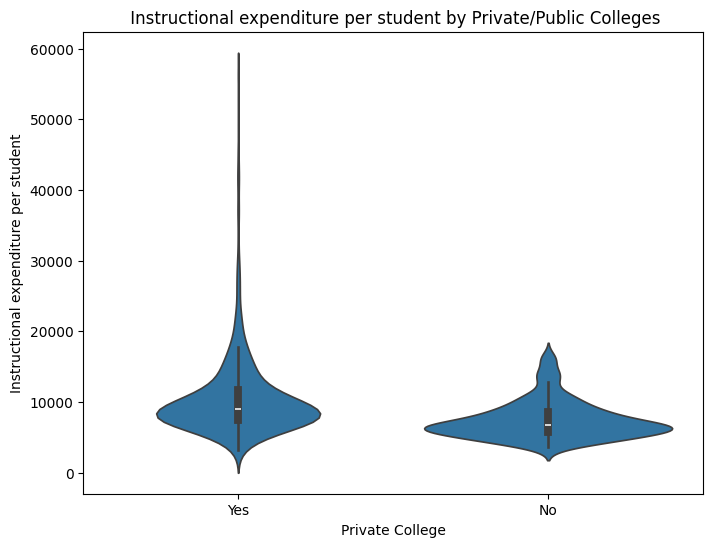

In [131]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=college_data, x='Private', y='Expend')
plt.title(' Instructional expenditure per student by Private/Public Colleges')
plt.xlabel('Private College')
plt.ylabel('Instructional expenditure per student')
plt.show()

#### 結果 | Results
- 普遍來說，公私立的每學生教學支出皆集中在相似的金額區域，但私立大學在每名學生的教學支出上有較大的分布範圍與變異性，且包含較高的支出上限；公立大學的支出則較為集中，主要落在較低的範圍內，兩者在教學資源投入上存在一些差異。
- In general, per-student instructional expenditures in both public and private universities are concentrated within a similar range. However, private universities exhibit a wider distribution and greater variability in per-student spending, including a higher upper limit. In contrast, public universities have more concentrated expenditures, primarily within a lower range. This indicates some differences in resource allocation for instruction between the two types of institutions.

#### 步驟1：依大學類型（公立 vs 私立）區分，觀察校友捐款比例（perc.alumni）與教學支出（Expend）之間的關係
#### Step 1: Observing the Relationship between Alumni Donation Rate (perc.alumni) and Instructional Expenditure (Expend) by University Type (Public vs. Private)

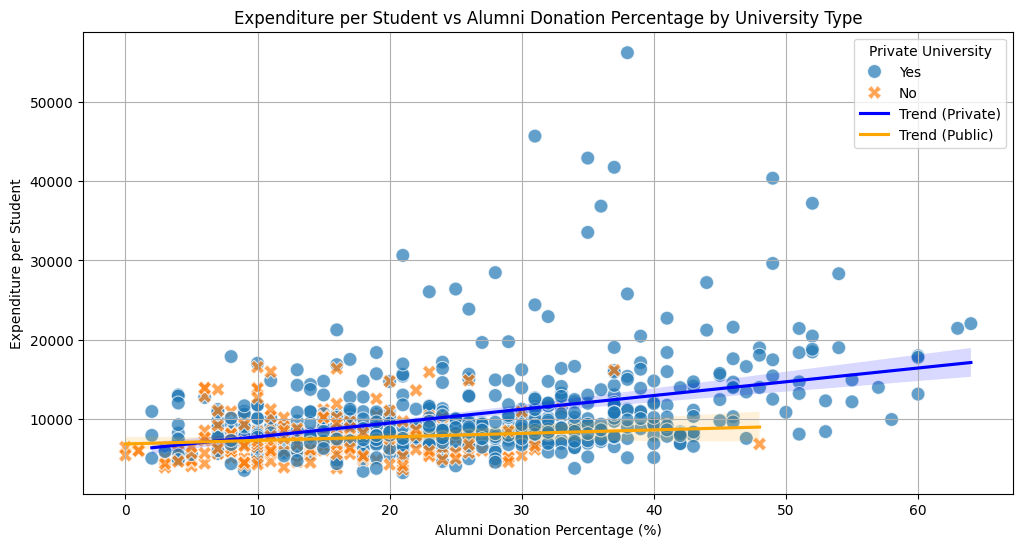

In [122]:
plt.figure(figsize=(12, 6))

# 繪製散佈圖，使用不同顏色與樣式區分私立與公立大學
sns.scatterplot(data=college_data, x='perc.alumni', y='Expend', hue='Private', style='Private', alpha=0.7, s=100)

# 加入趨勢線，分別為私立和公立大學加上各自的趨勢線
sns.regplot(data=college_data[college_data['Private'] == 'Yes'], x='perc.alumni', y='Expend', scatter=False, color='blue', label='Trend (Private)')
sns.regplot(data=college_data[college_data['Private'] == 'No'], x='perc.alumni', y='Expend', scatter=False, color='orange', label='Trend (Public)')

# 設置圖表標題和軸標籤
plt.title('Expenditure per Student vs Alumni Donation Percentage by University Type')
plt.xlabel('Alumni Donation Percentage (%)')
plt.ylabel('Expenditure per Student')
plt.legend(title='Private University')
plt.grid(True)
plt.show()

#### 結果 | Results
- 根據散點圖，私立大學的每學生教學支出會隨校友捐贈比例增加而略有上升，顯示兩者間有輕微關聯；而公立大學的支出則幾乎不受校友捐贈影響，近乎水平。這呈現出私立大學較依賴校友捐贈，導致教學支出變異較大，而公立大學的支出較為穩定，教學支出可能主要依靠其他穩定的資金來源。
- Expend per student in private universities shows a slight increase with higher alumni donation rates, indicating a mild correlation between the two. In contrast, instructional spending in public universities remains nearly level, showing little to no influence from alumni donations. This suggests that private universities rely more on alumni contributions, leading to greater variability in instructional spending, whereas public universities maintain more stable expenditures, likely due to reliance on other funding sources.

#### 步驟2：依高低畢業率區分，觀察校友捐款比例（perc.alumni）與教學支出（Expend）之間的關係
#### Step 2: Observing the Relationship between Alumni Donation Rate (perc.alumni) and Instructional Expenditure (Expend) by Graduation Rate (High vs. Low)

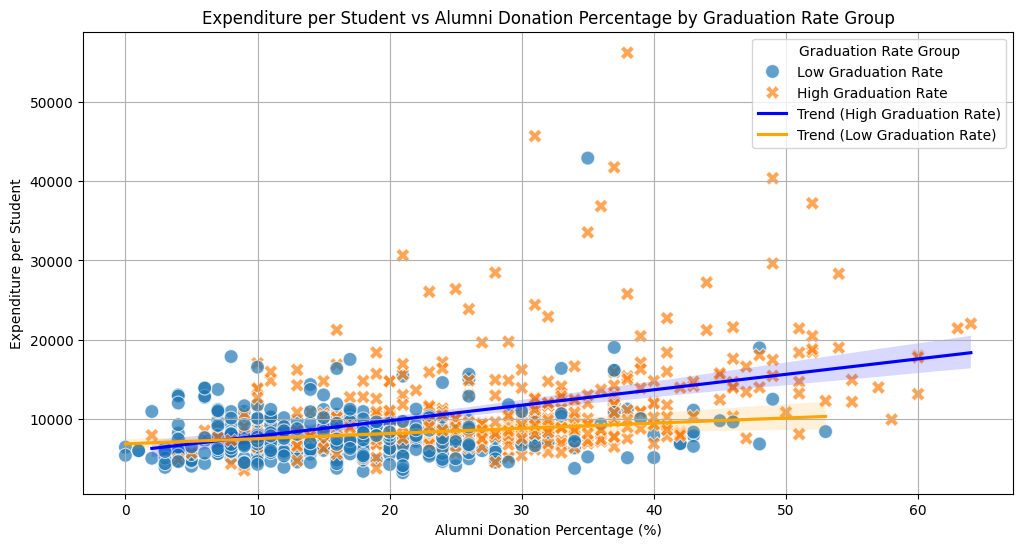

In [121]:
median_grad_rate = college_data['Grad.Rate'].median()
college_data['Grad_Rate_Group'] = np.where(college_data['Grad.Rate'] > median_grad_rate, 'High Graduation Rate', 'Low Graduation Rate')

plt.figure(figsize=(12, 6))

sns.scatterplot(data=college_data, x='perc.alumni', y='Expend', hue='Grad_Rate_Group', style='Grad_Rate_Group', alpha=0.7, s=100)

sns.regplot(data=college_data[college_data['Grad_Rate_Group'] == 'High Graduation Rate'], x='perc.alumni', y='Expend', scatter=False, color='blue', label='Trend (High Graduation Rate)')
sns.regplot(data=college_data[college_data['Grad_Rate_Group'] == 'Low Graduation Rate'], x='perc.alumni', y='Expend', scatter=False, color='orange', label='Trend (Low Graduation Rate)')

plt.title('Expenditure per Student vs Alumni Donation Percentage by Graduation Rate Group')
plt.xlabel('Alumni Donation Percentage (%)')
plt.ylabel('Expenditure per Student')
plt.legend(title='Graduation Rate Group')
plt.grid(True)
plt.show()

#### 結果 | Results
- 高畢業率學校（黃色叉叉）每名學生支出隨校友捐贈百分比增加而略有上升，顯示兩者可能存在關聯；而低畢業率學校的支出幾乎不受校友捐贈影響，趨勢線幾乎水平。可能代表校友捐贈對高畢業率學校的資源分配影響較大，有助於提升每學生的教學支出；而低畢業率學校的教學支出則較不依賴校友捐贈。
- In high-graduation-rate Universities (marked by yellow crosses), instructional expenditure per student tends to slightly increase with a higher alumni donation percentage, suggesting a possible correlation between the two. In contrast, in low-graduation-rate Universities, spending remains almost unaffected by alumni donations, with the trend line nearly flat. This may indicate that alumni donations have a greater impact on resource allocation in high-graduation-rate Universities, contributing to higher instructional spending per student, whereas low-graduation-rate Universities are less dependent on alumni contributions for their instructional expenditures.

### 結論 | Conclusion
- 畢業率較高的學校在校友捐款比例和教學支出上通常都有較高且較為集中的分佈，這顯示出校友支持和教學資源可能對提高畢業率有正面作用。並且在公私立學校的比較中，私立大學的校友捐款比例較公立大學更高，且私立大學的教學支出變異性較高，包含較高的支出上限。可能表明私立大學更依賴校友支持，以維持或提升教學資源的投入。
- Universities with higher graduation rates generally have higher and more concentrated distributions in both alumni donation rates and instructional expenditures. This suggests that alumni support and instructional resources may positively impact graduation rates. In comparing public and private institutions, private universities typically have a higher alumni donation rate than public universities, along with greater variability in instructional expenditures, including a higher upper spending limit. This may indicate that private universities rely more on alumni support to sustain or enhance their investment in instructional resources.

----

## F.Undergrad & P.Undergrad
#### 分析目的 | Purpose of Analysis：
- 用比例呈現公立與私立大學的全職與兼職大學生數量，觀察公私立大學在學生結構上的是否有差異。
- Presenting Full-Time and Part-Time Undergraduate Student Numbers by Proportion in Public vs. Private Universities to Observe Differences in Student Structure

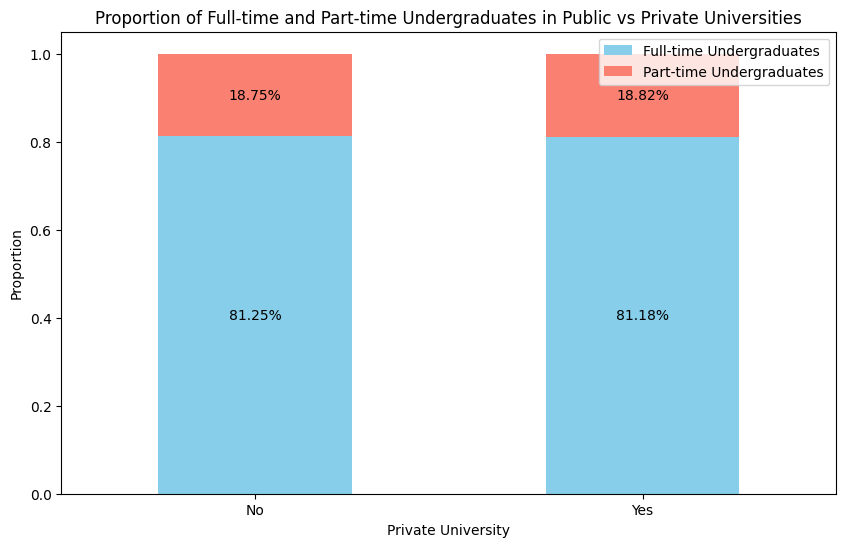

In [128]:
# 計算每個類別的比例
undergrad_means = college_data.groupby('Private')[['F.Undergrad', 'P.Undergrad']].mean()
undergrad_means['F.Undergrad Proportion'] = undergrad_means['F.Undergrad'] / (undergrad_means['F.Undergrad'] + undergrad_means['P.Undergrad'])
undergrad_means['P.Undergrad Proportion'] = undergrad_means['P.Undergrad'] / (undergrad_means['F.Undergrad'] + undergrad_means['P.Undergrad'])

# print(undergrad_means)

proportion_data = undergrad_means[['F.Undergrad Proportion', 'P.Undergrad Proportion']]

fig, ax = plt.subplots(figsize=(10, 6))
proportion_data.plot(kind='bar', stacked=True, ax=ax, color=['skyblue', 'salmon'])
ax.set_title("Proportion of Full-time and Part-time Undergraduates in Public vs Private Universities")
ax.set_xlabel("Private University")
ax.set_ylabel("Proportion")
ax.legend(["Full-time Undergraduates", "Part-time Undergraduates"], loc="upper right")
plt.xticks(rotation=0)

for i, (f_prop, p_prop) in enumerate(zip(proportion_data['F.Undergrad Proportion'], proportion_data['P.Undergrad Proportion'])):
    # Full-time percentage
    ax.text(i, f_prop / 2, f"{f_prop * 100:.2f}%", ha='center', va='center', color='black', fontsize=10)
    # Part-time percentage
    ax.text(i, f_prop + p_prop / 2, f"{p_prop * 100:.2f}%", ha='center', va='center', color='black', fontsize=10)

plt.show()

#### 結果 | Results
- 從圖表中可以看出，無論是公立還是私立大學，全職本科生佔的比例均顯著高於兼職本科生，且比例相近。公立大學的全職本科生約佔總學生數的 80% 以上，私立大學也呈現類似的比例，這表明在兩種學校類型中，全職學生佔有絕大多數。
- The chart shows that both public and private universities have a significantly higher proportion of full-time undergraduates, with similar ratios. In public universities, full-time students make up over 80% of the total, and private universities show a similar proportion, indicating a majority of full-time students across both institution types.

---

## Grad.Rate, Perc.alumni & S.F. Ratio
#### 分析目的 | Purpose of Analysis：
- 比較公立與私立大學的畢業率、校友捐贈百分比和師生比的平均值，了解公私立學校在這些指標上的差異。
- Comparing average graduation rates, alumni donation percentages, and student-faculty ratios between public and private universities, understanding the differences in these metrics by institution type.

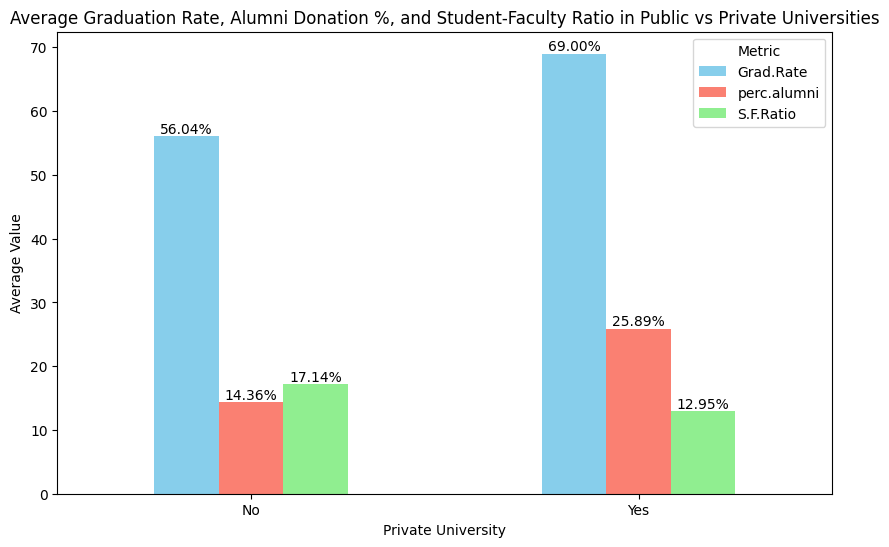

In [117]:
mean_values = college_data.groupby('Private')[['Grad.Rate', 'perc.alumni', 'S.F.Ratio']].mean()

fig, ax = plt.subplots(figsize=(10, 6))
bars = mean_values.plot(kind='bar', ax=ax, stacked=False, legend=True, color=['skyblue', 'salmon', 'lightgreen'])
ax.set_title("Average Graduation Rate, Alumni Donation %, and Student-Faculty Ratio in Public vs Private Universities")
ax.set_xlabel("Private University")
ax.set_ylabel("Average Value")

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', label_type="edge")

plt.xticks(rotation=0)
plt.legend(title="Metric")
plt.show()

#### 結果 | Results
- 群組長條圖顯示私立大學的畢業率和校友捐贈比例高於公立大學，且師生比相對較低，顯示私立學校在教學資源和校友資源方面相較公立學校有優勢。
- The grouped bar chart shows that private universities have higher graduation rates and alumni donation percentages, but lower student-faculty ratios, indicating advantages in teaching resources and alumni support.

---

C:\Users\User\AppData\Local\Temp\ipykernel_25472\4005213164.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot([private_grad_rate, public_grad_rate], vert=True, patch_artist=True, labels=['Private', 'Public'])


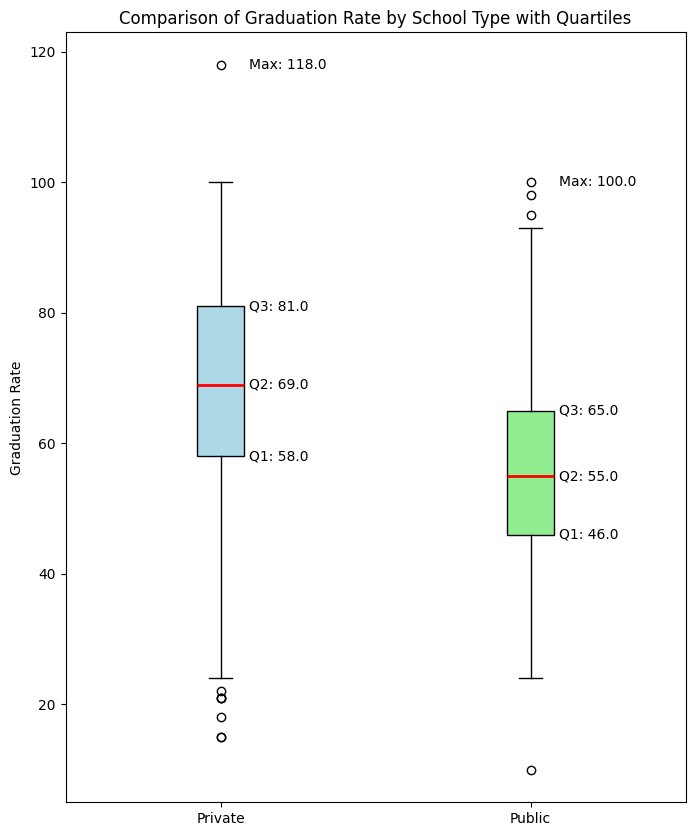

In [4]:
private_grad_rate = df[df['Private'] == 'Yes']['Grad.Rate'].dropna()
public_grad_rate = df[df['Private'] == 'No']['Grad.Rate'].dropna()

# 計算私立學校的四分位數
Q1_private = private_grad_rate.quantile(0.25)
Q2_private = private_grad_rate.quantile(0.5)  # 中位數
Q3_private = private_grad_rate.quantile(0.75)
Q4_private = private_grad_rate.max()  # 最大值

# 計算公立學校的四分位數
Q1_public = public_grad_rate.quantile(0.25)
Q2_public = public_grad_rate.quantile(0.5)
Q3_public = public_grad_rate.quantile(0.75)
Q4_public = public_grad_rate.max()

# 畫兩個箱型圖來比較私立和公立學校的畢業率（垂直）
fig, ax = plt.subplots(figsize=(8, 10))
box = ax.boxplot([private_grad_rate, public_grad_rate], vert=True, patch_artist=True, labels=['Private', 'Public'])

# 設定箱型圖的顏色
colors = ['lightblue', 'lightgreen']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    
for median in box['medians']:
    median.set_color('red')
    median.set_linewidth(2)  # 設定線條寬度，讓線條更明顯
# 標籤和對應四分位數
labels_private = ['Q1', 'Q2', 'Q3', 'Max']
quantiles_private = [Q1_private, Q2_private, Q3_private, Q4_private]

labels_public = ['Q1', 'Q2', 'Q3', 'Max']
quantiles_public = [Q1_public, Q2_public, Q3_public, Q4_public]

# 在 Q1 到 Q4 位置旁邊直接顯示標籤和數字（黑色） - 私立學校
for q, label in zip(quantiles_private, labels_private):
    ax.text(1.09, q, f'{label}: {q:.1f}', color='black', ha='left', va='center', fontsize=10)

# 在 Q1 到 Q4 位置旁邊直接顯示標籤和數字（黑色） - 公立學校
for q, label in zip(quantiles_public, labels_public):
    ax.text(2.09, q, f'{label}: {q:.1f}', color='black', ha='left', va='center', fontsize=10)

# 設定 y 軸範圍，使所有四分位數在圖中顯示
ax.set_ylim([min(private_grad_rate.min(), public_grad_rate.min()) - 5, 
             max(private_grad_rate.max(), public_grad_rate.max()) + 5])

# 設定標題與軸標籤
ax.set_title("Comparison of Graduation Rate by School Type with Quartiles")
ax.set_ylabel("Graduation Rate")

# 顯示圖表
plt.show()

### 結論 | Conclusion
#### 展示私立和公立學校的畢業率的分佈情況，私立學校的中位數（Q2）為 69，高於公立學校的中位數 55，四分位數（Q1 和 Q3）的範圍在私立學校中為 58 到 81，公立學校為 46 到 65，可以看出私立學校的四分位範圍也略高，顯示私立學校畢業率的整體水準偏高。特別的是，私立學校中其中一間學校的畢業率為118，可能是該校較多推行雙聯學位的關係，以致於畢業人數大於原始入學人數。私立學校的整體畢業率範圍比公立學校更大（約 20 到 118），而公立學校的範圍較小（約 20 到 100），表明私立學校的畢業率分布較廣，而公立學校的分佈相對更集中。
#### The distribution of graduation rates in private and public schools shows that the median (Q2) for private schools is 69, which is higher than the median of 55 for public schools. The interquartile range (Q1 and Q3) for private schools spans from 58 to 81, whereas for public schools, it ranges from 46 to 65. This indicates that the interquartile range for private schools is slightly higher, suggesting an overall higher graduation rate in private schools. Notably, one private school has a graduation rate of 118, which might be attributed to a larger proportion of dual-degree programs, resulting in a graduation count that exceeds the initial enrollment. The overall graduation rate range is wider for private schools (approximately 20 to 118) than for public schools (approximately 20 to 100), indicating a broader distribution of graduation rates in private schools, while public schools display a more concentrated distribution.

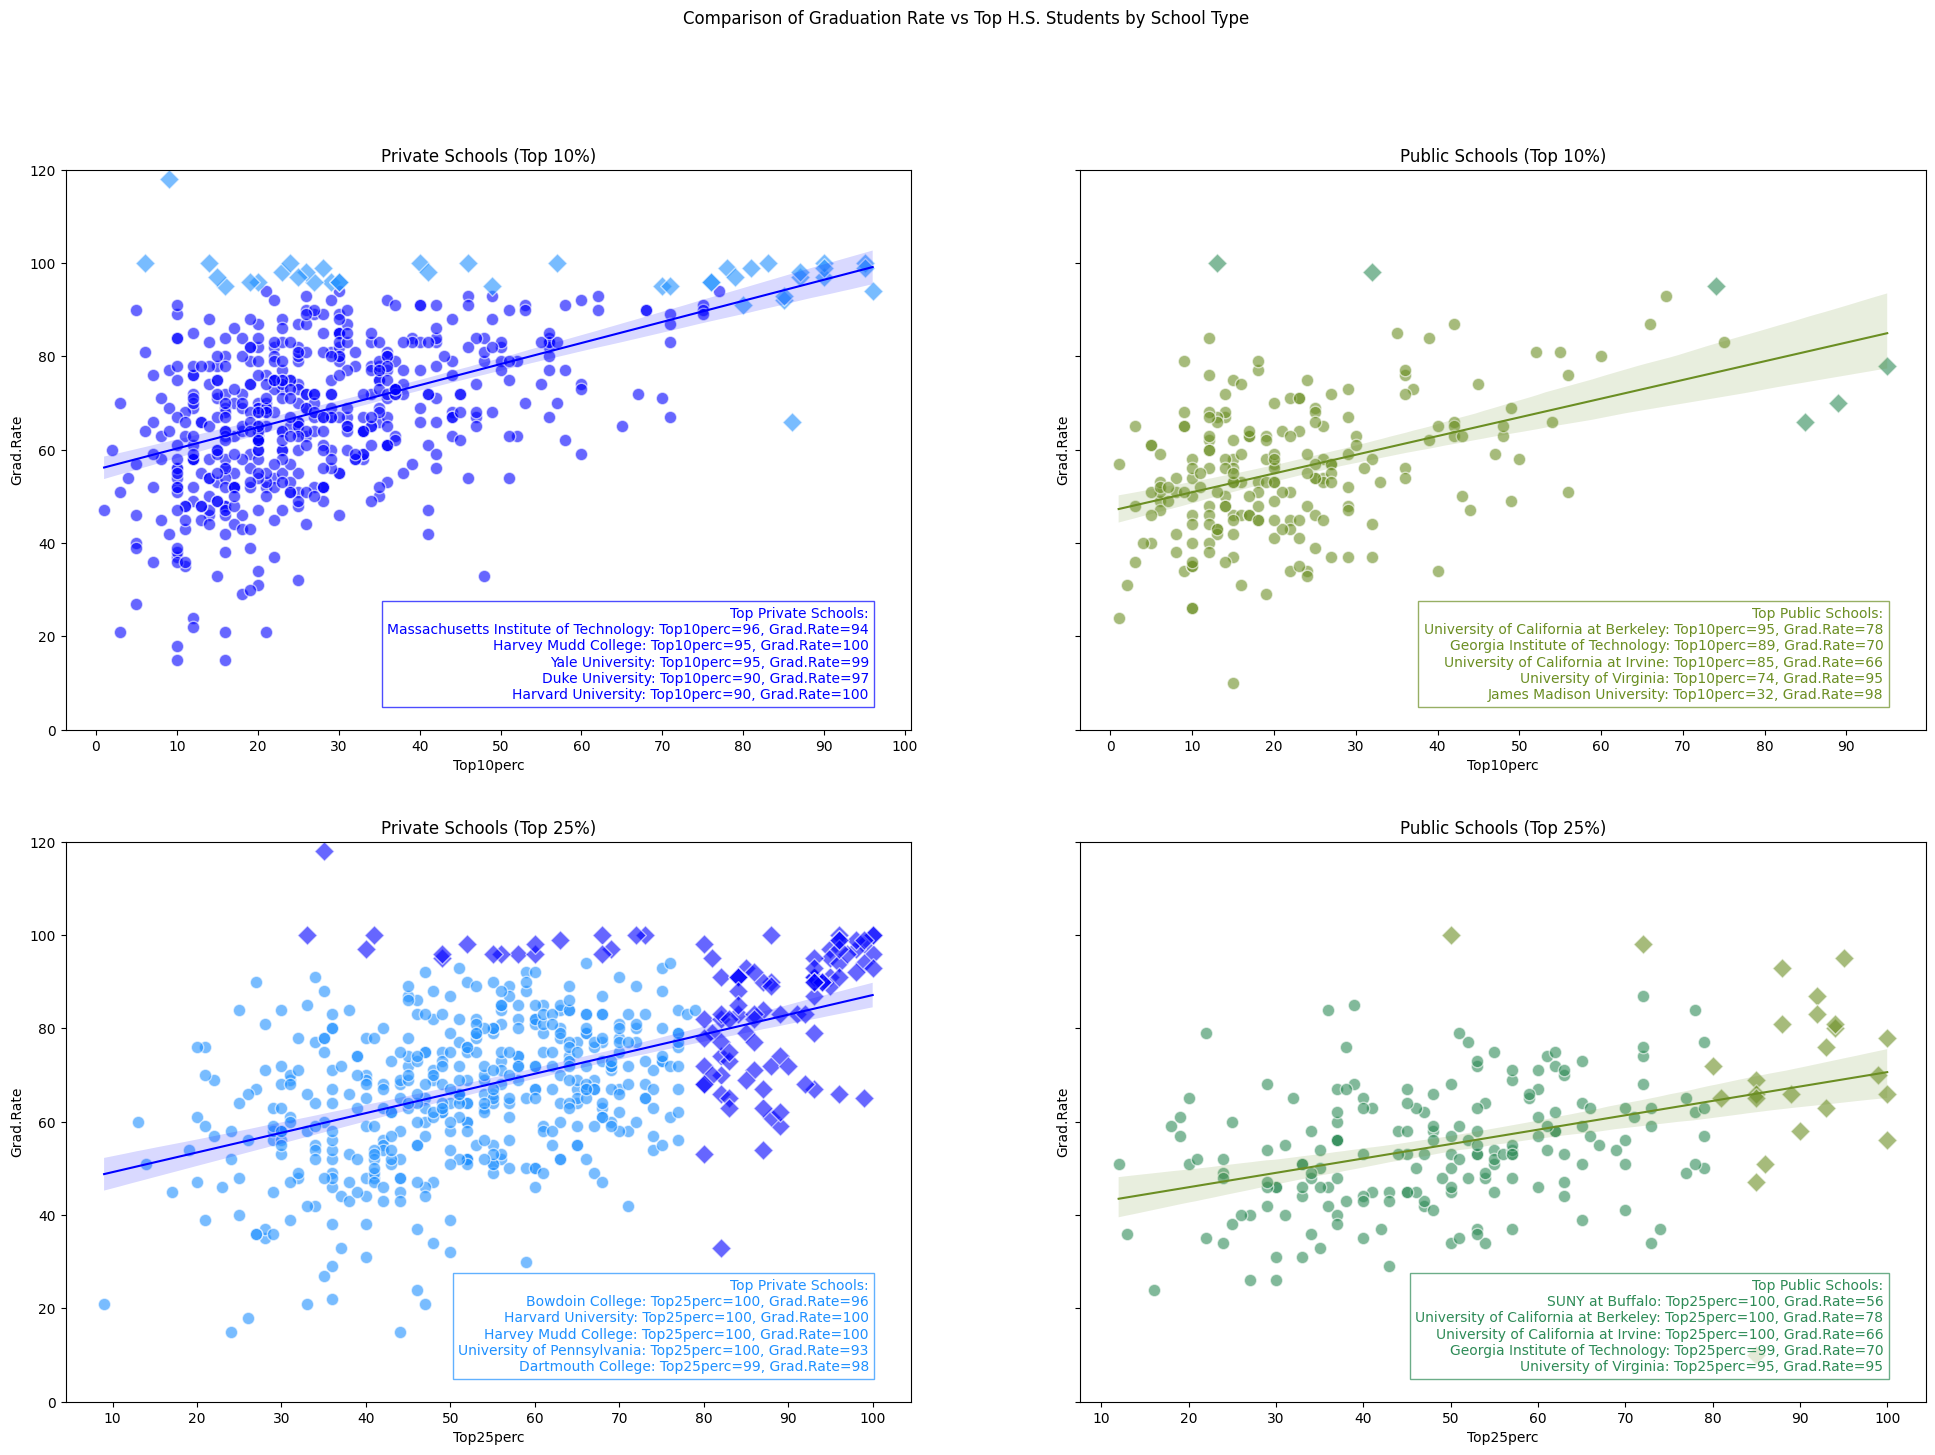

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# 將私立和公立學校分開
private_schools = df[df['Private'] == 'Yes']
public_schools = df[df['Private'] == 'No']

# 篩選出符合條件的私立和公立學校
high_achieving_private_top10 = private_schools[(private_schools['Top10perc'] >= 80) | (private_schools['Grad.Rate'] >= 95)]
high_achieving_public_top10 = public_schools[(public_schools['Top10perc'] >= 80) | (public_schools['Grad.Rate'] >= 95)]

high_achieving_private_top25 = private_schools[(private_schools['Top25perc'] >= 80) | (private_schools['Grad.Rate'] >= 95)]
high_achieving_public_top25 = public_schools[(public_schools['Top25perc'] >= 80) | (public_schools['Grad.Rate'] >= 95)]

# 私立學校：優先從Top10perc中找前5，若不足再從Grad.Rate中找
top_private_schools_by_top10 = high_achieving_private_top10.nlargest(5, 'Top10perc')
if len(top_private_schools_by_top10) < 5:
    remaining_private_schools = high_achieving_private_top10.drop(top_private_schools_by_top10.index)
    top_private_schools_by_grad_rate = remaining_private_schools.nlargest(5 - len(top_private_schools_by_top10), 'Grad.Rate')
    top_private_schools_top10 = pd.concat([top_private_schools_by_top10, top_private_schools_by_grad_rate])
else:
    top_private_schools_top10 = top_private_schools_by_top10

# 公立學校：優先從Top10perc中找前5，若不足再從Grad.Rate中找
top_public_schools_by_top10 = high_achieving_public_top10.nlargest(5, 'Top10perc')
if len(top_public_schools_by_top10) < 5:
    remaining_public_schools = high_achieving_public_top10.drop(top_public_schools_by_top10.index)
    top_public_schools_by_grad_rate = remaining_public_schools.nlargest(5 - len(top_public_schools_by_top10), 'Grad.Rate')
    top_public_schools_top10 = pd.concat([top_public_schools_by_top10, top_public_schools_by_grad_rate])
else:
    top_public_schools_top10 = top_public_schools_by_top10

# 私立學校：優先從 Top25perc 中找前5，若不足再從 Grad.Rate 中找
top_private_schools_by_top25 = high_achieving_private_top25.nlargest(5, 'Top25perc')
if len(top_private_schools_by_top25) < 5:
    remaining_private_schools = high_achieving_private_top25.drop(top_private_schools_by_top25.index)
    top_private_schools_by_grad_rate = remaining_private_schools.nlargest(5 - len(top_private_schools_by_top25), 'Grad.Rate')
    top_private_schools_top25 = pd.concat([top_private_schools_by_top25, top_private_schools_by_grad_rate])
else:
    top_private_schools_top25 = top_private_schools_by_top25

# 公立學校：優先從 Top25perc 中找前5，若不足再從 Grad.Rate 中找
top_public_schools_by_top25 = high_achieving_public_top25.nlargest(5, 'Top25perc')
if len(top_public_schools_by_top25) < 5:
    remaining_public_schools = high_achieving_public_top25.drop(top_public_schools_by_top25.index)
    top_public_schools_by_grad_rate = remaining_public_schools.nlargest(5 - len(top_public_schools_by_top25), 'Grad.Rate')
    top_public_schools_top25 = pd.concat([top_public_schools_by_top25, top_public_schools_by_grad_rate])
else:
    top_public_schools_top25 = top_public_schools_by_top25
    
# 創建包含兩個子圖的畫布, sharey=True共享相同的 y 軸範圍
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(24, 16), sharey=True)

# 顯示私立學校 Top10perc 和 Top25perc 散點圖
ax1.scatter(private_schools[~((private_schools['Top10perc'] >= 80) | (private_schools['Grad.Rate'] >= 95))]['Top10perc'], 
            private_schools[~((private_schools['Top10perc'] >= 80) | (private_schools['Grad.Rate'] >= 95))]['Grad.Rate'], 
            color='blue', alpha=0.6, edgecolors='w', s=80, marker='o', label='Private - Others')
ax1.scatter(high_achieving_private_top10['Top10perc'], high_achieving_private_top10['Grad.Rate'], 
            color='dodgerblue', alpha=0.6, edgecolors='w', s=100, marker='D', label='Private - Top')
ax1.set_title("Private Schools (Top 10%)")
# ax1.set_xlabel("Top 10% of H.S. Class (Top10perc)")
ax1.set_ylabel("Graduation Rate")

ax3.scatter(private_schools[~((private_schools['Top25perc'] >= 80) | (private_schools['Grad.Rate'] >= 95))]['Top25perc'], 
            private_schools[~((private_schools['Top25perc'] >= 80) | (private_schools['Grad.Rate'] >= 95))]['Grad.Rate'], 
            color='dodgerblue', alpha=0.6, edgecolors='w', s=80, marker='o', label='Private - Others')
ax3.scatter(high_achieving_private_top25['Top25perc'], high_achieving_private_top25['Grad.Rate'], 
            color='blue', alpha=0.6, edgecolors='w', s=100, marker='D', label='Private - Top')
ax3.set_title("Private Schools (Top 25%)")
ax3.set_xlabel("Top of H.S. Class (TopNperc)")
ax3.set_ylabel("Graduation Rate")

# 顯示公立學校 Top10perc 和 Top25perc 散點圖
ax2.scatter(public_schools[~((public_schools['Top10perc'] >= 80) | (public_schools['Grad.Rate'] >= 95))]['Top10perc'], 
            public_schools[~((public_schools['Top10perc'] >= 80) | (public_schools['Grad.Rate'] >= 95))]['Grad.Rate'], 
            color='olivedrab', alpha=0.6, edgecolors='w', s=80, marker='o', label='Public - Others')
ax2.scatter(high_achieving_public_top10['Top10perc'], high_achieving_public_top10['Grad.Rate'], 
            color='seagreen', alpha=0.6, edgecolors='w', s=100, marker='D', label='Public - Top')
ax2.set_title("Public Schools (Top 10%)")
# ax2.set_xlabel("Top 10% of H.S. Class (Top10perc)")

ax4.scatter(public_schools[~((public_schools['Top25perc'] >= 80) | (public_schools['Grad.Rate'] >= 95))]['Top25perc'], 
            public_schools[~((public_schools['Top25perc'] >= 80) | (public_schools['Grad.Rate'] >= 95))]['Grad.Rate'], 
            color='seagreen', alpha=0.6, edgecolors='w', s=80, marker='o', label='Public - Others')
ax4.scatter(high_achieving_public_top25['Top25perc'], high_achieving_public_top25['Grad.Rate'], 
            color='olivedrab', alpha=0.6, edgecolors='w', s=100, marker='D', label='Public - Top')
# ax4.scatter(public_schools['Top25perc'], public_schools['Grad.Rate'], color='seagreen', alpha=0.6, edgecolors='w', s=80)
ax4.set_title("Public Schools (Top 25%)")
ax4.set_xlabel("Top of H.S. Class (TopNperc)")

# 設置相同的 y 軸範圍，以便比較
ax1.set_ylim([0, 120])
ax2.set_ylim([0, 120])
ax3.set_ylim([0, 120])
ax4.set_ylim([0, 120])
# 設置 x 軸刻度為 10 的間隔
ax1.set_xticks(range(0, 101, 10))
ax2.set_xticks(range(0, 101, 10))
ax3.set_xticks(range(0, 101, 10))
ax4.set_xticks(range(0, 101, 10))

# 格式化學校名稱及其對應的 Top10perc 和 Grad.Rate
private_info_top10 = '\n'.join(
    [f"{row['Unnamed: 0']}: Top10perc={row['Top10perc']}, Grad.Rate={row['Grad.Rate']}" 
     for idx, row in top_private_schools_top10.iterrows()]
)
private_info_top25 = '\n'.join(
    [f"{row['Unnamed: 0']}: Top25perc={row['Top25perc']}, Grad.Rate={row['Grad.Rate']}" 
     for idx, row in top_private_schools_top25.iterrows()]
)
public_info_top10 = '\n'.join(
    [f"{row['Unnamed: 0']}: Top10perc={row['Top10perc']}, Grad.Rate={row['Grad.Rate']}" 
     for idx, row in top_public_schools_top10.iterrows()]
)
public_info_top25 = '\n'.join(
    [f"{row['Unnamed: 0']}: Top25perc={row['Top25perc']}, Grad.Rate={row['Grad.Rate']}" 
     for idx, row in top_public_schools_top25.iterrows()]
)

# 在每個子圖的右下角添加學校標註
ax1.text(0.95, 0.05, f"Top Private Schools:\n{private_info_top10}", 
         transform=ax1.transAxes, fontsize=10, va='bottom', ha='right', color='blue', 
         bbox=dict(facecolor='white', edgecolor='blue', alpha=0.7))

ax2.text(0.95, 0.05, f"Top Public Schools:\n{public_info_top10}", 
         transform=ax2.transAxes, fontsize=10, va='bottom', ha='right', color='olivedrab', 
         bbox=dict(facecolor='white', edgecolor='olivedrab', alpha=0.7))

ax3.text(0.95, 0.05, f"Top Private Schools:\n{private_info_top25}", 
         transform=ax3.transAxes, fontsize=10, va='bottom', ha='right', color='dodgerblue', 
         bbox=dict(facecolor='white', edgecolor='dodgerblue', alpha=0.7))

ax4.text(0.95, 0.05, f"Top Public Schools:\n{public_info_top25}", 
         transform=ax4.transAxes, fontsize=10, va='bottom', ha='right', color='seagreen', 
         bbox=dict(facecolor='white', edgecolor='seagreen', alpha=0.7))
sns.regplot(data=private_schools, x='Top10perc', y='Grad.Rate', scatter=False, color='blue', ax=ax1, line_kws={'linestyle':'-', 'linewidth': 1.5}, label='Overall Trend')
sns.regplot(data=public_schools, x='Top10perc', y='Grad.Rate', scatter=False, color='olivedrab', ax=ax2, line_kws={'linestyle':'-', 'linewidth': 1.5}, label='Overall Trend')
sns.regplot(data=private_schools, x='Top25perc', y='Grad.Rate', scatter=False, color='blue', ax=ax3, line_kws={'linestyle':'-', 'linewidth': 1.5}, label='Overall Trend')
sns.regplot(data=public_schools, x='Top25perc', y='Grad.Rate', scatter=False, color='olivedrab', ax=ax4, line_kws={'linestyle':'-', 'linewidth': 1.5}, label='Overall Trend')
# 顯示總標題
plt.suptitle("Comparison of Graduation Rate vs Top H.S. Students by School Type")
plt.show()

### 結論 | Conclusion
#### 從畢業率（Graduation Rate）的角度來分析「私立」與「公立」學校，並探討其與「Top10%」或「Top25%」高中生成績表現的關聯性。根據敘述，學術表現優異的高中生多數選擇就讀私立大學，而較少選擇公立大學，這個現象值得進一步研究。同時，數據顯示私立大學的整體畢業率通常高於公立學校，這與前面的分析結果一致。因此，選取高中生成績表現高的五所大學，前提是該大學學生中來自「Top10%」或「Top25%」的高中生成績比例達80%以上；若不滿五所，則優先選畢業率達95%以上的大學，這時便不再考慮高中成績。
#### From the perspective of graduation rates, this analysis examines the differences between private and public universities and explores their relationship with high school performance indicators, specifically the "Top 10%" or "Top 25%" of high school students. According to the data, academically stronger high school students generally tend to choose private universities over public universities, a trend that may warrant further research. Additionally, statistics show that the overall graduation rate at private universities is generally higher than at public universities, consistent with previous findings. Therefore, this study selects the top five universities with a high proportion of students from the top-performing high school groups, where at least 80% of the enrolled students are within the "Top 10%" or "Top 25%" of their high school class. If fewer than five universities meet this criterion, additional universities are chosen based on a graduation rate of 95% or higher, regardless of high school performance.

---

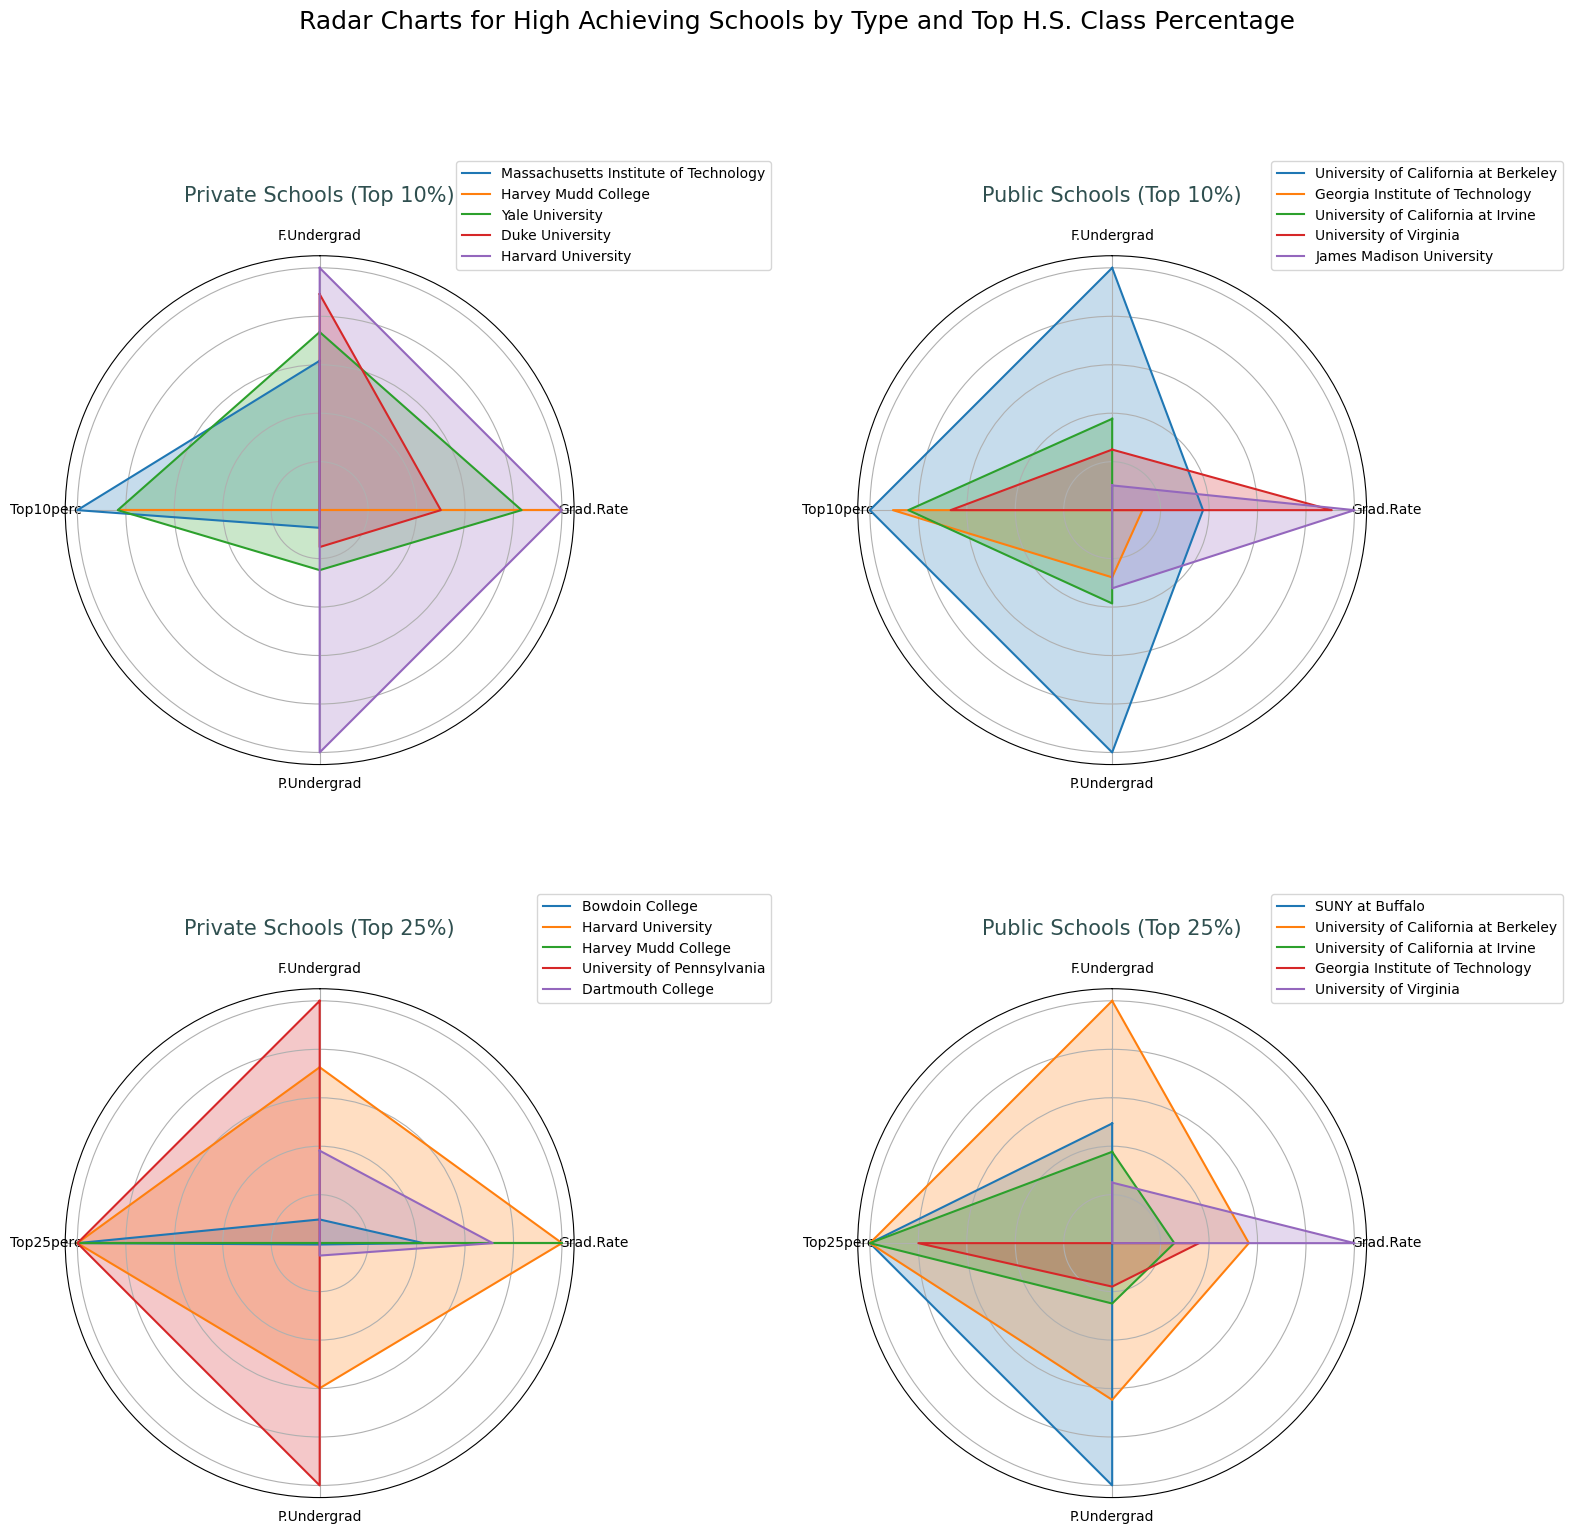

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to select the top 5 schools, prioritizing top_percent, then Grad.Rate if needed
def select_top_schools(schools, top_percent_col):
    top_schools_by_top_percent = schools.nlargest(5, top_percent_col)  # Get top 5 by top_percent
    if len(top_schools_by_top_percent) < 5:
        # If fewer than 5, supplement with highest Grad.Rate from remaining
        remaining_schools = schools.drop(top_schools_by_top_percent.index)
        top_schools_by_grad_rate = remaining_schools.nlargest(5 - len(top_schools_by_top_percent), 'Grad.Rate')
        top_schools = pd.concat([top_schools_by_top_percent, top_schools_by_grad_rate])
    else:
        top_schools = top_schools_by_top_percent
    return top_schools

# Separate private and public school data
private_schools = df[df['Private'] == 'Yes']
public_schools = df[df['Private'] == 'No']

# Apply the threshold filter before selecting top schools
high_achieving_private_top10 = private_schools[(private_schools['Top10perc'] >= 80) | (private_schools['Grad.Rate'] >= 95)]
high_achieving_public_top10 = public_schools[(public_schools['Top10perc'] >= 80) | (public_schools['Grad.Rate'] >= 95)]
high_achieving_private_top25 = private_schools[(private_schools['Top25perc'] >= 80) | (private_schools['Grad.Rate'] >= 95)]
high_achieving_public_top25 = public_schools[(public_schools['Top25perc'] >= 80) | (public_schools['Grad.Rate'] >= 95)]

# Select top schools based on Top10perc and Top25perc with the thresholded data
top_private_schools_top10 = select_top_schools(high_achieving_private_top10, 'Top10perc')
top_public_schools_top10 = select_top_schools(high_achieving_public_top10, 'Top10perc')
top_private_schools_top25 = select_top_schools(high_achieving_private_top25, 'Top25perc')
top_public_schools_top25 = select_top_schools(high_achieving_public_top25, 'Top25perc')

# Radar plot function and plotting code remains unchanged
# Function to plot radar chart and add legends
def plot_radar(data, title, ax):
    # Normalize data to 0-1 range
    data = (data - data.min()) / (data.max() - data.min())
    num_vars = len(data.columns)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Close the polygon

    # Create radar plot
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    for index, row in data.iterrows():
        values = row.tolist()
        values += values[:1]  # Close the polygon
        ax.plot(angles, values, label=index)  # Add label for each line
        ax.fill(angles, values, alpha=0.25)

    # Set ticks and title
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(data.columns)
    ax.set_yticklabels([])
    ax.set_title(title, size=15, color='darkslategray', pad=20)
    
    # Add legend in upper right corner
    ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1.2))

# Create 2x2 radar charts
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 16), subplot_kw=dict(polar=True))

# Radar chart - Private Schools Top10perc
plot_radar(
    top_private_schools_top10[['F.Undergrad', 'Grad.Rate', 'P.Undergrad', 'Top10perc']].set_index(top_private_schools_top10['Unnamed: 0']),
    "Private Schools (Top 10%)",
    ax1
)

# Radar chart - Public Schools Top10perc
plot_radar(
    top_public_schools_top10[['F.Undergrad', 'Grad.Rate', 'P.Undergrad', 'Top10perc']].set_index(top_public_schools_top10['Unnamed: 0']),
    "Public Schools (Top 10%)",
    ax2
)

# Radar chart - Private Schools Top25perc
plot_radar(
    top_private_schools_top25[['F.Undergrad', 'Grad.Rate', 'P.Undergrad', 'Top25perc']].set_index(top_private_schools_top25['Unnamed: 0']),
    "Private Schools (Top 25%)",
    ax3
)

# Radar chart - Public Schools Top25perc
plot_radar(
    top_public_schools_top25[['F.Undergrad', 'Grad.Rate', 'P.Undergrad', 'Top25perc']].set_index(top_public_schools_top25['Unnamed: 0']),
    "Public Schools (Top 25%)",
    ax4
)

# Display title and layout
plt.suptitle("Radar Charts for High Achieving Schools by Type and Top H.S. Class Percentage", size=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### 結論 | Conclusion
- Top 10%學生比例：
    - 在私立學校中（左上圖），「Top 10%」學生的比例較為集中並且較高，特別是哈佛大學、耶魯大學等頂尖私立大學，顯示這些大學吸引了更多學術表現優異的學生。
    - 在公立學校中（右上圖），「Top 10%」學生比例也存在，但一般低於私立學校的比例，這可能反映了較多優秀學生更偏向選擇私立大學。
- Top 25%學生比例：
    - 在私立學校中（左下圖），「Top 25%」學生比例依然較高，特別是哈佛大學、波士頓學院等。
    - 在公立學校中（右下圖），「Top 25%」比例則較為分散，雖然部分學校如加州大學伯克利分校和喬治亞理工學院的比例較高，但整體仍低於私立學校。
- 畢業率（Grad Rate）：
    - 私立學校（左側兩圖）通常具有較高的畢業率，尤其是像哈佛和耶魯這樣的頂尖大學，畢業率接近或達到100%。
    - 公立學校的畢業率相對較低，並且在「Top 10%」與「Top 25%」兩組中均表現出此差異，反映了私立學校在畢業率上普遍優於公立學校。
- 學生人數（FUndergrad 和 PUndergrad）：
    - 公立學校的本科生人數（FUndergrad）和研究生人數（PUndergrad）通常顯著高於私立學校，這反映了公立學校往往規模更大、學生人數更多。
    - 私立學校在這兩個指標上顯示出較小的數值，說明私立學校的學生規模相對較小，這可能有助於更高的畢業率和更集中的資源分配。

#### 這些圖表顯示出私立大學在吸引學術表現優異的學生（Top 10%和Top 25%）、保持高畢業率方面具有優勢，而公立大學則傾向於規模較大、學生人數較多。這些趨勢可能反映了私立和公立學校在資源分配、教學模式及入學策略上的差異。

- Top 10% Student Proportion:
    - Among private universities (top left chart), the proportion of students from the "Top 10%" is relatively high and concentrated, especially at elite institutions like Harvard University and Yale University. This indicates that private universities attract more academically strong students.
    - For public universities (top right chart), the "Top 10%" student proportion is present but generally lower than in private universities, which may reflect a trend where top-performing students are more inclined to choose private universities.
- Top 25% Student Proportion:
    - In private universities (bottom left chart), the "Top 25%" student proportion also remains high, with schools like Harvard and Bowdoin College showing significant percentages.
    - In public universities (bottom right chart), the "Top 25%" proportion is more dispersed. Although some schools, such as the University of California, Berkeley, and Georgia Institute of Technology, have higher proportions, the overall level remains below that of private universities.
- Graduation Rate (Grad Rate):
    - Private universities (left side charts) generally have higher graduation rates, especially at top institutions like Harvard and Yale, where graduation rates are close to or at 100%.
    - Public universities, on the other hand, exhibit relatively lower graduation rates across both "Top 10%" and "Top 25%" groups, indicating that private universities tend to have higher overall graduation rates.
- Student Enrollment (FUndergrad and PUndergrad):
    - Public universities generally have significantly higher undergraduate (FUndergrad) and postgraduate (PUndergrad) enrollments, reflecting their larger size and capacity.
    - Private universities, by contrast, display lower values in these categories, indicating smaller student populations, which may contribute to higher graduation rates and more concentrated resource allocation.
#### These charts suggest that private universities have an advantage in attracting top-performing students (Top 10% and Top 25%) and maintaining high graduation rates, whereas public universities tend to be larger, with greater student populations. These trends may reflect differences in resource allocation, instructional models, and admissions strategies between private and public institutions.

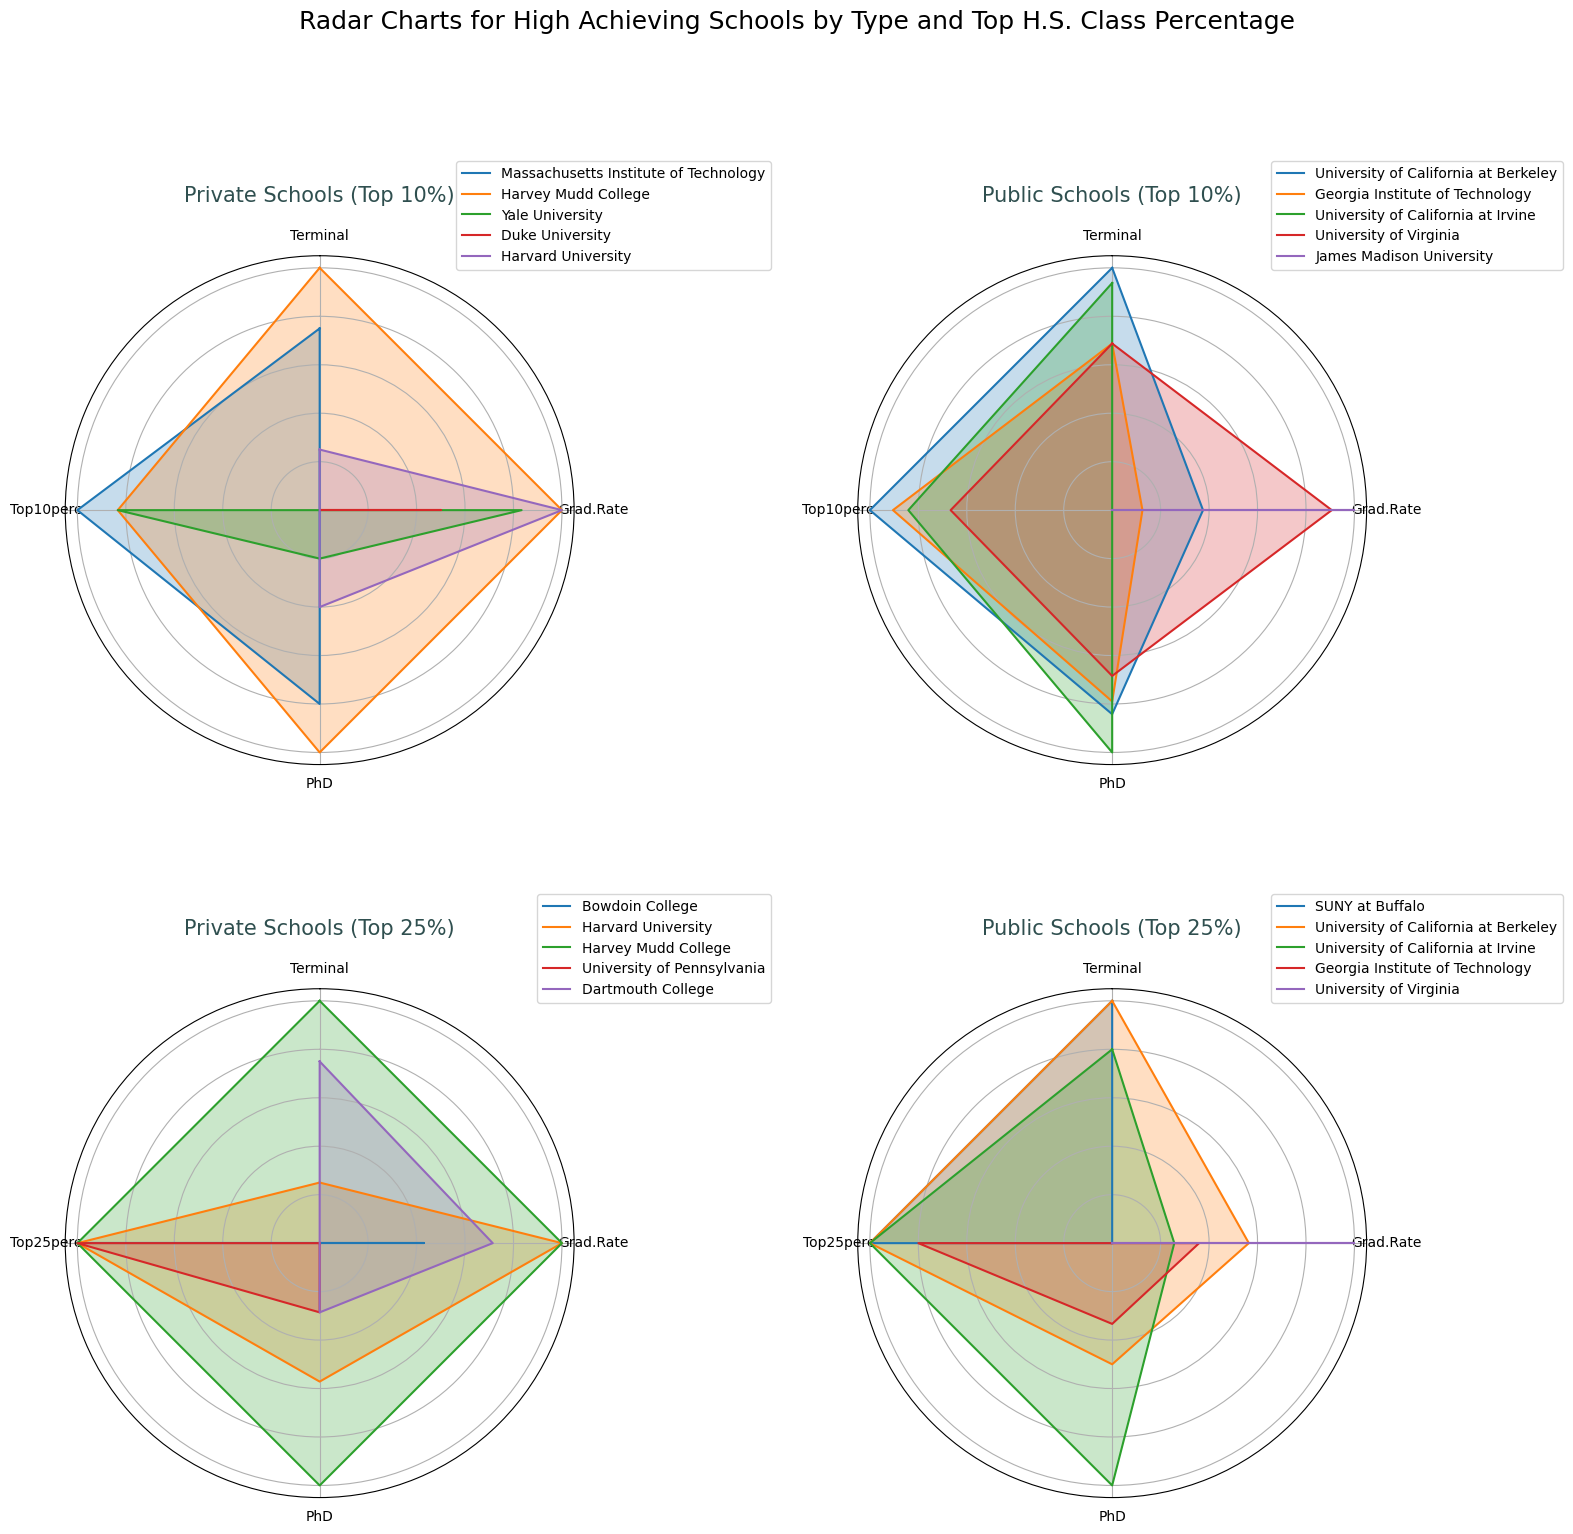

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to select the top 5 schools, prioritizing top_percent, then Grad.Rate if needed
def select_top_schools(schools, top_percent_col):
    top_schools_by_top_percent = schools.nlargest(5, top_percent_col)  # Get top 5 by top_percent
    if len(top_schools_by_top_percent) < 5:
        # If fewer than 5, supplement with highest Grad.Rate from remaining
        remaining_schools = schools.drop(top_schools_by_top_percent.index)
        top_schools_by_grad_rate = remaining_schools.nlargest(5 - len(top_schools_by_top_percent), 'Grad.Rate')
        top_schools = pd.concat([top_schools_by_top_percent, top_schools_by_grad_rate])
    else:
        top_schools = top_schools_by_top_percent
    return top_schools

# Separate private and public school data
private_schools = df[df['Private'] == 'Yes']
public_schools = df[df['Private'] == 'No']

# Apply the threshold filter before selecting top schools
high_achieving_private_top10 = private_schools[(private_schools['Top10perc'] >= 80) | (private_schools['Grad.Rate'] >= 95)]
high_achieving_public_top10 = public_schools[(public_schools['Top10perc'] >= 80) | (public_schools['Grad.Rate'] >= 95)]
high_achieving_private_top25 = private_schools[(private_schools['Top25perc'] >= 80) | (private_schools['Grad.Rate'] >= 95)]
high_achieving_public_top25 = public_schools[(public_schools['Top25perc'] >= 80) | (public_schools['Grad.Rate'] >= 95)]

# Select top schools based on Top10perc and Top25perc with the thresholded data
top_private_schools_top10 = select_top_schools(high_achieving_private_top10, 'Top10perc')
top_public_schools_top10 = select_top_schools(high_achieving_public_top10, 'Top10perc')
top_private_schools_top25 = select_top_schools(high_achieving_private_top25, 'Top25perc')
top_public_schools_top25 = select_top_schools(high_achieving_public_top25, 'Top25perc')

# Radar plot function and plotting code remains unchanged
# Function to plot radar chart and add legends
def plot_radar(data, title, ax):
    # Normalize data to 0-1 range
    data = (data - data.min()) / (data.max() - data.min())
    num_vars = len(data.columns)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Close the polygon

    # Create radar plot
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    for index, row in data.iterrows():
        values = row.tolist()
        values += values[:1]  # Close the polygon
        ax.plot(angles, values, label=index)  # Add label for each line
        ax.fill(angles, values, alpha=0.25)

    # Set ticks and title
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(data.columns)
    ax.set_yticklabels([])
    ax.set_title(title, size=15, color='darkslategray', pad=20)
    
    # Add legend in upper right corner
    ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1.2))

# Create 2x2 radar charts
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 16), subplot_kw=dict(polar=True))

# Radar chart - Private Schools Top10perc
plot_radar(
    top_private_schools_top10[['Terminal', 'Grad.Rate', 'PhD', 'Top10perc']].set_index(top_private_schools_top10['Unnamed: 0']),
    "Private Schools (Top 10%)",
    ax1
)

# Radar chart - Public Schools Top10perc
plot_radar(
    top_public_schools_top10[['Terminal', 'Grad.Rate', 'PhD', 'Top10perc']].set_index(top_public_schools_top10['Unnamed: 0']),
    "Public Schools (Top 10%)",
    ax2
)

# Radar chart - Private Schools Top25perc
plot_radar(
    top_private_schools_top25[['Terminal', 'Grad.Rate', 'PhD', 'Top25perc']].set_index(top_private_schools_top25['Unnamed: 0']),
    "Private Schools (Top 25%)",
    ax3
)

# Radar chart - Public Schools Top25perc
plot_radar(
    top_public_schools_top25[['Terminal', 'Grad.Rate', 'PhD', 'Top25perc']].set_index(top_public_schools_top25['Unnamed: 0']),
    "Public Schools (Top 25%)",
    ax4
)

# Display title and layout
plt.suptitle("Radar Charts for High Achieving Schools by Type and Top H.S. Class Percentage", size=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### 結論 | Conclusion
- 私立學校的「Terminal」與「PhD」指標：
    - 私立大學在「Top 10%」和「Top 25%」組別中顯示出較高的「Terminal」指標，這說明許多學生的最高學位就是碩士。
    - 「PhD」指標相對較低，這可能反映出在這些私立大學中，進一步攻讀博士學位的學生比例相對較低，或是該領域的最高學位就只有到碩士。
    - 例如，哈佛大學和哈維穆德學院的「Terminal」指標較大，而「PhD」指標較小，表明這些學校可能更多地集中在培養完成本科或碩士學位後直接進入職場的學生。
- 公立學校的「Terminal」與「PhD」指標：
    - 在公立大學中，雖然「Terminal」指標依然較高，但相對於私立大學，「PhD」指標則顯示出更高的比例。
    - 表明在一些公立學校中，學生選擇繼續攻讀博士學位的比例較高，公立學校可能提供了更多的研究導向課程或資源，以支持這些學術進階需求。
    - 例如，加州大學伯克利分校的「PhD」指標在公立學校中相對突出，說明該校具有較強的研究氛圍，吸引更多學生繼續深造。
- 畢業率（Grad Rate）與「Terminal」及「PhD」的關聯：
    - 私立學校在「Top 10%」和「Top 25%」組別中保持較高的畢業率，並伴隨較高的「Terminal」指標，這說明許多私立學校學生完成本科或碩士後即順利畢業並進入職場。
    - 公立學校的畢業率相對較低，但「PhD」指標的比例較高，表明部分公立大學吸引了更多有意願追求博士學位的學生。
#### 這些圖表顯示，私立大學在Terminal上的比例較高，說明其課程設計更偏向直接職業或是應用導向。而公立大學的「PhD」指標相對穩定，表明它們可能提供更多的研究機會，吸引志在繼續攻讀博士的學生。反映私立與公立大學在教育重點和資源分配上的差異。

- Terminal and PhD Indicators for Private Schools:
    - Private universities show a relatively high "Terminal" indicator in both the "Top 10%" and "Top 25%" groups, suggesting that a master’s degree is the highest level of education for many students in these institutions.
    - The "PhD" indicator is comparatively low, possibly indicating that fewer students in these private universities pursue a doctorate, or that a master's degree is the highest level offered in certain fields.
    - For example, Harvard University and Harvey Mudd College have a higher "Terminal" indicator and a lower "PhD" indicator, suggesting that these schools may focus more on preparing students to enter the workforce after completing an undergraduate or master’s degree.
- Terminal and PhD Indicators for Public Schools:
    - In public universities, while the "Terminal" indicator is still high, the "PhD" indicator shows a higher proportion compared to private universities.
    - This suggests that a larger proportion of students in some public universities choose to pursue a doctorate. Public universities may offer more research-oriented programs or resources to support these advanced academic pursuits.
    - For instance, the University of California, Berkeley, has a relatively prominent "PhD" indicator among public universities, indicating a strong research environment that attracts more students interested in further study.
- Relationship Between Graduation Rate, Terminal, and PhD:
    - Private universities maintain higher graduation rates in the "Top 10%" and "Top 25%" groups, along with higher "Terminal" indicators, indicating that many private university students successfully complete their undergraduate or master’s studies and enter the workforce.
    - Public universities have comparatively lower graduation rates but show a higher proportion in the "PhD" indicator, suggesting that some public universities attract more students who are inclined to pursue a doctorate.
#### These charts reveal that private universities have a higher proportion of students completing a terminal degree, indicating a focus on career or applied programs. In contrast, the relatively stable "PhD" indicator for public universities suggests that they may offer more research opportunities, attracting students interested in continuing to a doctoral level. This reflects differences in educational focus and resource allocation between private and public universities.

---

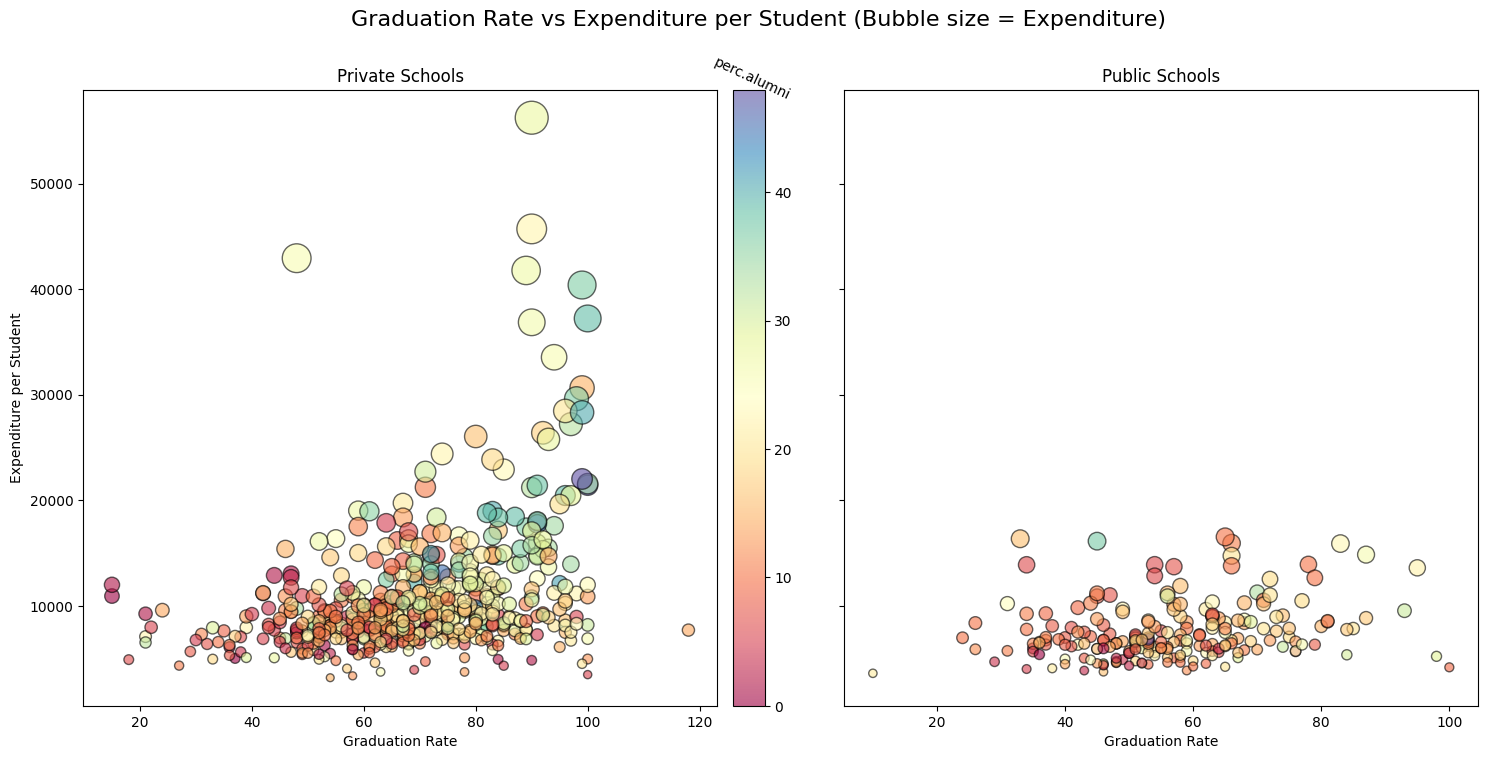

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# 分離私立和公立學校數據
private_schools = df[df['Private'] == 'Yes']
public_schools = df[df['Private'] == 'No']

# 創建圖表
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8), sharey=True)

# 私立學校的散點圖
sc1 = ax1.scatter(
    private_schools['Grad.Rate'], private_schools['Expend'],
    s=private_schools['Expend'] / 100,  # 調整氣泡大小
    c=private_schools['perc.alumni'], cmap='Spectral', alpha=0.6, edgecolor='k'
)
ax1.set_title("Private Schools")
ax1.set_xlabel("Graduation Rate")
ax1.set_ylabel("Expenditure per Student")

# 公立學校的散點圖
sc2 = ax2.scatter(
    public_schools['Grad.Rate'], public_schools['Expend'],
    s=public_schools['Expend'] / 100,  # 調整氣泡大小
    c=public_schools['perc.alumni'], cmap='Spectral', alpha=0.6, edgecolor='k'
)
ax2.set_title("Public Schools")
ax2.set_xlabel("Graduation Rate")

# 添加 color bar 並使用 inset_axes 手動定位
cbar_ax = inset_axes(ax2, width="5%", height="100%", loc='center left', borderpad=-8)  # 調整 borderpad 控制位置
cbar = fig.colorbar(sc2, cax=cbar_ax, orientation='vertical')
cbar.set_label("perc.alumni", rotation=335, labelpad=0, loc='top')

plt.suptitle("Graduation Rate vs Expenditure per Student (Bubble size = Expenditure)", fontsize=16)
plt.show()


### 結論 | Conclusion
- 私立學校有較高的每位學生支出，畢業率通常也較高，並且校友捐贈率較高的學校集中在高畢業率和高支出的區域。公立學校的學生支出較低且範圍狹窄，畢業率相對分散且與支出關聯較弱，校友捐贈率普遍偏低。這張圖揭示私立與公立學校在資金投入和畢業率上的差異，反映出私立學校較高的財政投入可能是促成較高畢業率的因素之一；而公立學校則在較少資金支出的情況下運作，畢業率和校友捐贈率也相對較低。
- Private universities tend to have higher per-student expenditures and generally higher graduation rates. universities with higher alumni donation rates are concentrated in the areas of high graduation rates and high expenditures. Public universities have lower per-student expenditures within a narrower range, with graduation rates that are more varied and less correlated with expenditure levels. Alumni donation rates are generally lower. This chart reveals differences in financial investment and graduation rates between private and public universities, suggesting that the higher financial investment in private universities may be a contributing factor to their higher graduation rates. Public universities, on the other hand, operate with lower per-student spending and generally exhibit lower graduation and alumni donation rates.